In [4]:
import os

import tmap

import pool.utils.data_prep
from pool.utils import model_utils
from pool.model import DualCRBMRelu, PoolCRBMRelu, PCRSpecificity
import pool.analysis.analysis_methods as am
import pool.analysis.analysis_methods_crbm as amc
import pool.utils.graph_utils as gu

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch
import json
import math
import subprocess as sp
import matplotlib.image as mpimg

In [5]:
if not os.path.exists("./generated"):
    os.mkdir("./generated")

# Load Model and Data

### Give Model Location and Runfile Location

In [6]:
# Directory of Stored CRBMs
mdir = "/home/jonah/PycharmProjects/pool_harmonium/datasets/cov/trained/"
runfile = "/home/jonah/PycharmProjects/pool_harmonium/datasets/cov/run_files/enriched_specificity.yaml"

config = model_utils.load_run(runfile)
rounds = [config["name"]]

train_fastas = config["fasta_file"]
if type(train_fastas) is list:
    data_keys = [x.split(".")[0] for x in train_fastas]
else:
    data_keys = [train_fastas.split(".")[0]]

In [5]:
config


{'name': 'cov_spec_enriched',
 'training_instances': 1,
 'dataset_directory': './datasets/cov/data/',
 'save_directory': './datasets/cov/trained/',
 'gpus': 1,
 'precision': 'single',
 'seed_selection': 0,
 'epochs': 500,
 'fasta_file': ['cov_enriched.fasta'],
 'data_worker_num': 2,
 'alphabet': 'dna',
 'q': 5,
 'v_num': 40,
 'test_set_size': 0.1,
 'validation_set_size': 0.15,
 'sequence_weights_selection': 'None',
 'sampling_strategy': 'weighted',
 'sampling_weights_selection': 'fasta',
 'label_spacing': [0.0, 6.0],
 'label_fraction': [1.0],
 'sample_multiplier': 50,
 'model_type': 'PCRSpecificity',
 'batch_size': 20000,
 'mc_moves': 1,
 'sample_type': 'pcd',
 'sfrac': 0.95,
 'exps': 3.0,
 'lgap': 0.0,
 'l1_2': 1.0,
 'lf': 200.0,
 'lcov': 1.0,
 'ld': 1.0,
 'ls': 1.0,
 'dr': 0.0,
 'optimizer': 'AdamW',
 'weight_decay': 0.01,
 'lr': 0.0005,
 'lr_final': 5e-05,
 'decay_after': 0.75,
 'convolution_topology': {'hidden_25': {'number': 100,
   'kernel': [35, 5],
   'stride': [1, 1],
   'padd

### Load CRBM

In [7]:
# Get's checkpoint and directory for latest version of the trained model
checkp, version_dir = am.get_checkpoint_path(rounds[0], model_dir=mdir) #, version=25)

# load crbm
# ncrbm = DualCRBMRelu.load_from_checkpoint(checkp)
# ncrbm = PoolCRBMRelu.load_from_checkpoint(checkp)
ncrbm = PCRSpecificity.load_from_checkpoint(checkp)
ncrbm.eval()
ncrbm.data_sampler.set_device('cuda')

### Generate PDF of all Weights used by the CRBM

In [5]:
# Generate Weight PDF inside mdir/version_dir
# order weights by descending l2 norm
model_utils.all_weights(ncrbm, name=version_dir + rounds[0] + "_unordered", order_weights=False)
model_utils.all_weights(ncrbm, name=version_dir + rounds[0] + "_ordered", order_weights=True)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

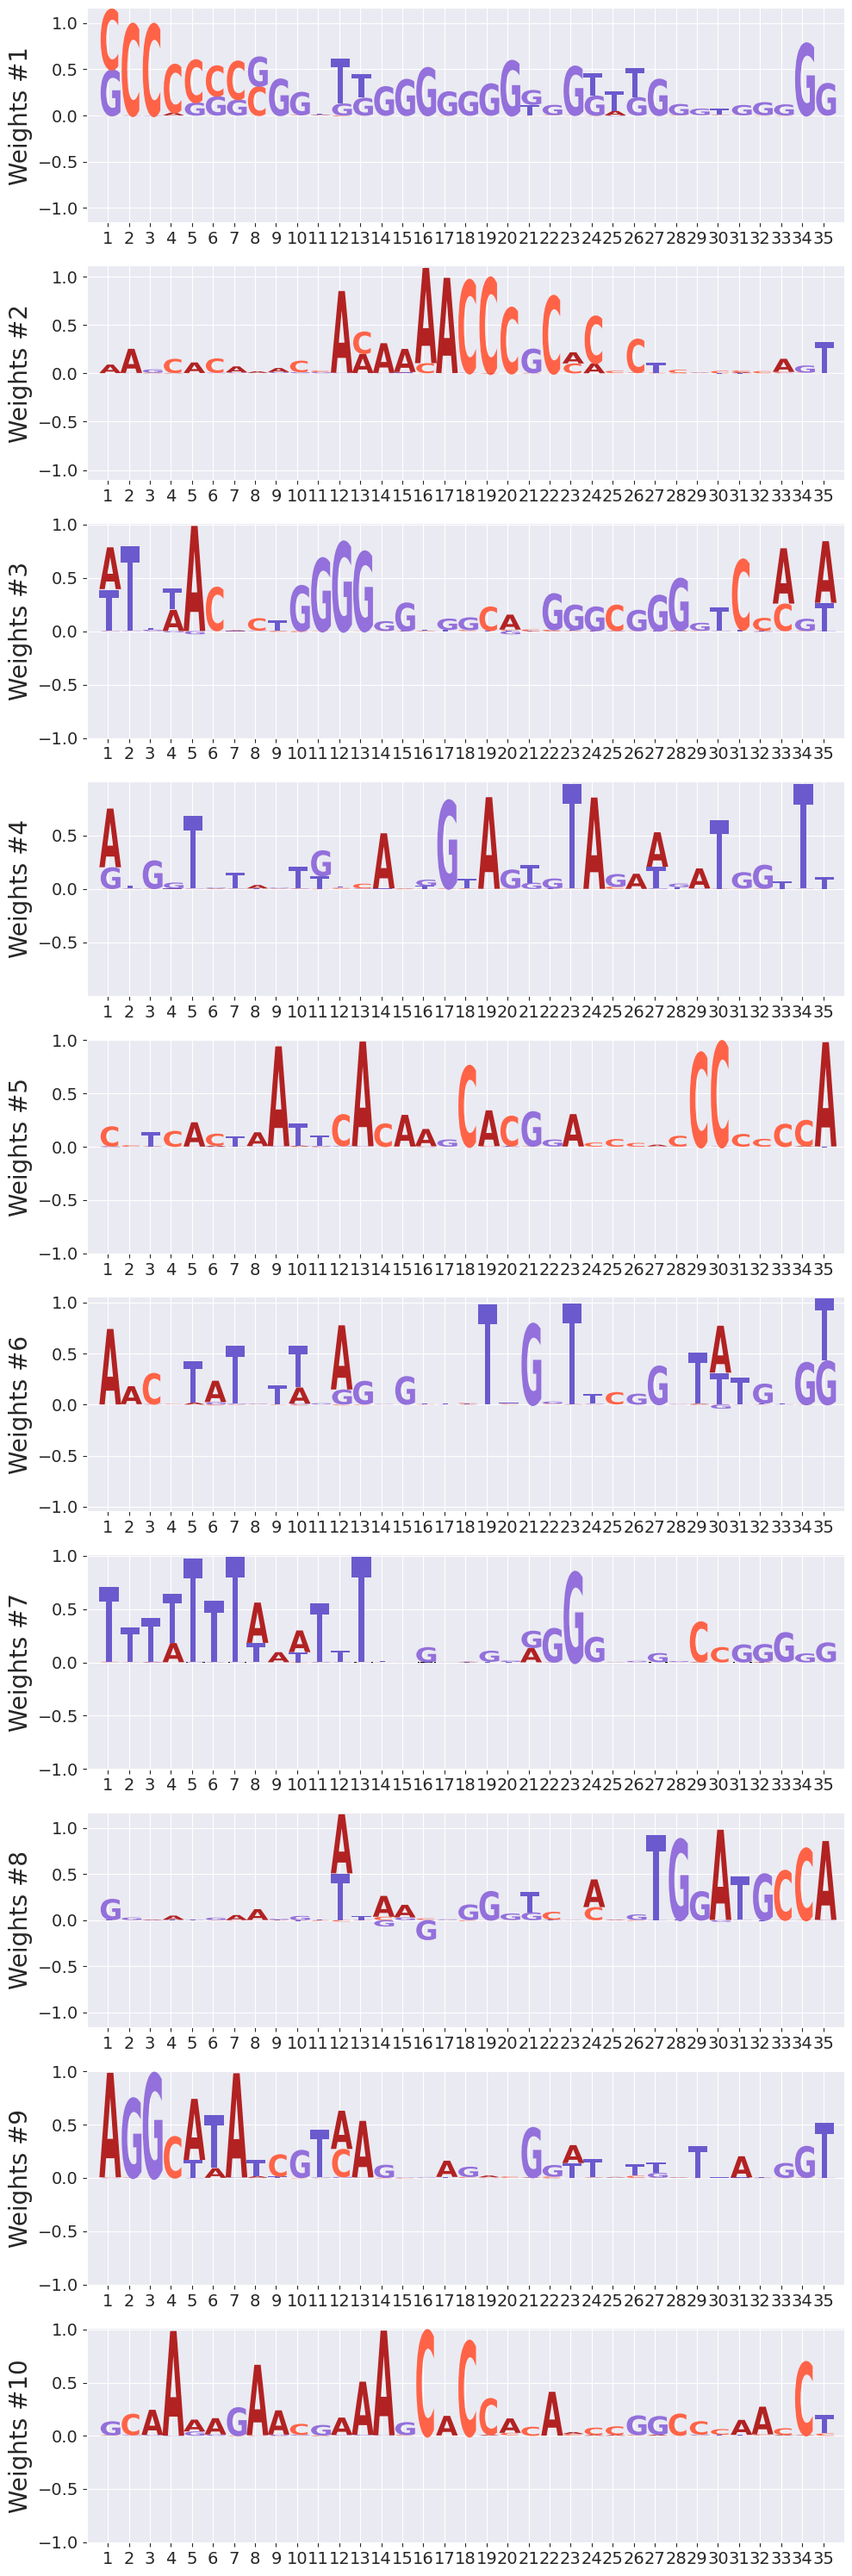

In [6]:
# View individual weight

am.view_weights_crbm(ncrbm, ncrbm.hidden_convolution_keys[0], sort="top", selected=list(range(10)), alphabet="dna")

### Load Data, and assign to train, val, test

In [8]:
# Put all data into dictionary
# dir(s) is location of fasta file used during training
# optional assignment for
all_data = am.fetch_data(data_keys, directory="../data/", alphabet=ncrbm.alphabet, assignment_function=None, threads=12, drop_duplicates=False)

# Assign data to train, valid, testy under round column
# Generated during model training
with open(version_dir + "dataset_indices.json", "r") as json_file:
    di = json.load(json_file)

print("Total Sequences:", all_data.index.__len__())

new_rounds = np.full((all_data.index.__len__()), "valid")
new_rounds[di["train_indices"]] = "train"
new_rounds[di["test_indices"]] = "testy"

all_data["round"] = new_rounds.tolist()

Process Time 0.007916450500488281
Total Sequences: 14714


## tmap Visualization

In [6]:
from pool.utils.seq_utils import create_tokens, tokenize
cov_tokens = create_tokens(all_data["sequence"].tolist(), tokenize, cpus=5, k=5)

In [7]:
import tmap as tm

seed = 38
dims = 64
tokens = cov_tokens

# CFG_TMAP = tm.LayoutConfiguration()
# CFG_TMAP.k = 50
# CFG_TMAP.kc = 50
# CFG_TMAP.node_size = 1 / 20

enc = tm.Minhash(len(tokens), seed, dims)
lf = tm.LSHForest(dims * 2, 64, store=True)

lf.batch_add(enc.batch_from_string_array(tokens))
lf.index()

In [53]:
def hamming_dist(s1, s2):
    d = 0
    for sid, s in enumerate(s1):
        if s != s2[sid]:
            d += 1
    return d

s3 = "ATGCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTG" # shift 3
s1 = "ACCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGAT" # shift 1 end mut
t0 = "CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG"
t1 = "CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATA" # 1 end mut
t2 = "CCATGGTAGGTATTACTTGGTAGGGATAGTGGGCTTGATG" # 1 mid mut
t3 = "CCATGGTAGGTCTTACTTGGAAGGGATAGTGGGCTTGATG" # 2 mid mut
t4 = "CCATGGTAGGTCTTACATGGAAGCGATAGTGGGCTTGATG" # 4 mid mut
t5 = "CCAAGGTAGGTGTTACATGGAAGCGATAGTGGGCTTGATG" # 6 mid mut
t6 = "CCAAGGTAGGTGATAGATGGATGCCATAGTGGGCTTGATG" # 10 mid mut

toks = create_tokens([t0, t1, t2, t3, t4, t5, t6, s1, s3], tokenize, cpus=5, k=4)

tmp = enc.batch_from_string_array(toks)

In [55]:
print(enc.get_distance(tmp[0], tmp[8]), hamming_dist(t0, s3)/len(t0))


0.17622673511505127 0.75


In [32]:
all_data.head()

sequence  copy_num  round assignment  \
0  CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG  4.297475  testy        N/A   
1  CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGGTG  4.238403  valid        N/A   
2  CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGCTG  4.057590  train        N/A   
3  CCATTGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG  4.028253  train        N/A   
4  CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGAT  4.017087  train        N/A   

   likelihood  
0  194.051025  
1  190.031555  
2  190.495972  
3  189.374634  
4  192.416016

In [ ]:
CFG_TMAP = tm.LayoutConfiguration()
CFG_TMAP.k = 50
CFG_TMAP.kc = 50
CFG_TMAP.node_size = 1 / 20

enc = tm.Minhash(len(tokens), seed, dims)
lf = tm.LSHForest(dims * 2, 64, store=True)

lf.batch_add(enc.batch_from_string_array(tokens))
lf.index()

x, y, s, t, _ = tm.layout_from_lsh_forest(lf, CFG_TMAP)
# lf.clear()

from faerun import Faerun

dataframe = all_data

dataframe["g_content"] = dataframe["sequence"].str.count("G")
dataframe["c_content"] = dataframe["sequence"].str.count("C")

plot_data = {"x": x, "y": y, "c": [dataframe["copy_num"].to_list(), dataframe["g_content"].to_list(),
                                   dataframe["c_content"].to_list(), dataframe["likelihood"]], "labels": dataframe["sequence"].to_list()}

frun = Faerun(view="front", coords=False, clear_color='#222222')
frun.add_scatter(
    "COV",
    plot_data,
    colormap=["rainbow", "rainbow"],
    point_scale=2.0,
    max_point_size=10,
    shader="smoothCircle",
    has_legend=True,
    categorical=[False, False],
    legend_title=["Log Enrichment", "G Content", "C Content", "Model Likelihood"]
)
frun.add_tree(
    "COV_tree", {"from": s, "to": t}, point_helper="COV", color="#666666"
)
frun.plot("cov")

-62.2601
-69.7201
-70.8642
-60.2595
-66.826
-62.8526
-62.695
-50.104
-56.247
-50.8701
-54.1507
10.5229
-17.4845
-65.4668
-80.381
-91.111
-68.7312
19.6518
-90.0216
-116.344
28.1013
-68.1954
28.2922
-55.5751
-57.9412
-71.109
15.505
-61.1513
-1.78456
22.328
-57.8215
-64.1998
17.5405
-37.6606
-1.64956
-41.4087
-73.6344
-30.7698
43.1306
52.8124
2.33163
-61.2239
-68.1005
12.7778
-35.3264
-56.2098
-103.961
44.1927
-15.3644
-21.04
-3.92715
137.425
-82.5534
-86.4604
-67.6183
-77.3706
8.82279
-9.77677
-2.27213
-103.888
-53.6466
-102.076
-20.2184
-28.0956
18.9129
31.2359
-69.6404
27.1339
-1.79368
80.96
45.684
-30.2813
-28.1369
-4.28979
76.8861
40.79
-38.7781
-54.9981
47.4572
-3.702
-5.68137
13.3565
-101.609
126.79
-49.2964
-11.7873
-54.3779
11.3725
21.0636
-60.3216
-35.5344
-39.1254
-16.4917
18.0302
-2.84796
-58.8498
-69.0797
-96.7581
-82.361
-62.5801
9.61434
-41.514
-21.748
-26.9002
-50.961
10.97
-50.4881
2.47187
-56.3103
-49.3661
60.276
54.3382
80.8139
-18.1591
-70.4823
-18.7305
44.509
-46.9409

KeyboardInterrupt: 

7
-22.6662
-95.5741
-101.674
57.0249
-34.7725
-92.6336
-18.3719
-32.2461
61.3625
-17.7799
-7.79643
-18.347
0.528812
109.195
-11.6845
-9.42636
8.07135
-50.1003
-31.0091
-35.0386
-19.1163
-98.1949
-1.85156
-53.6519
60.1387
24.7348
-97.2299
-41.5335
-31.3152
-0.126795
33.4242
148.215
-11.5863
-41.5231
-30.4047
-34.2858
-146.07
-59.4605
-106.537
-20.3493
5.40574
-101.094
-63.5028
78.8266
10.951
-45.9077
-103.223
69.6602
68.1754
-142.639
36.6994
-128.743
17.6382
-62.2518
86.7603
-16.5223
31.5491
19.8476
-19.8614
-50.2455
-18.6402
-11.5294
-59.8426
-21.3609
-0.891061
-88.329
68.2762
-89.8936
-7.88313
12.1483
-14.6985
-7.62934
-41.3459
-45.382
64.5891
-142.245
-46.7551
-47.6246
22.8283
122.432
17.1928
-56.274
82.2815
22.7657
-88.8475
-117.123
13.9439
11.0334
-22.274
-77.4587
-105.361
10.0861
-100.129
39.5629
-37.2203
-68.1185
-42.2987
-90.1752
-96.2994
41.9913
49.8407
-53.7703
-107.482
-70.2136
-82.0448
-54.4777
-51.4918
63.6089
-75.4565
-83.7727
112.439
7.96158
32.3497
-41.7042
-119.472
55.1

In [14]:
lf.get_distance_by_id(0, 4)

0.25

# Get Likelihoods From Model

In [8]:
# calculate likelihoods and fitness values
import torch
# device = torch.device("cpu")
# ncrbm.to(device)
# ncrbm.eval()

am.generate_likelihoods(ncrbm, all_data, f"cov_likelihoods", key='round', out_dir="./generated/")
am.generate_likelihoods(ncrbm, all_data, f"cov_likelihoods_ind", key='round', out_dir="./generated/", individual_hiddens=True)


Learning betas...
Elapsed time: 18.396180629730225, Acceptance rates: tensor([1.0022, 1.0004, 1.0037, 1.0035, 1.0038, 1.0041, 1.0051, 1.0066, 1.0043,
        1.0059], device='cuda:0')
Initial evaluation: log(Z) = tensor([86.9312], device='cuda:0')
Iteration 2000, beta: 0.10000000149011612
Current evaluation: log(Z)= tensor(86.9280, device='cuda:0') +- tensor(9.7703e-05, device='cuda:0')
Iteration 4000, beta: 0.20000000298023224
Current evaluation: log(Z)= tensor(86.9253, device='cuda:0') +- tensor(0.0002, device='cuda:0')
Iteration 6000, beta: 0.30000001192092896
Current evaluation: log(Z)= tensor(86.9233, device='cuda:0') +- tensor(0.0002, device='cuda:0')
Iteration 8000, beta: 0.4000000059604645
Current evaluation: log(Z)= tensor(86.9223, device='cuda:0') +- tensor(0.0002, device='cuda:0')
Iteration 10000, beta: 0.5
Current evaluation: log(Z)= tensor(86.9227, device='cuda:0') +- tensor(0.0002, device='cuda:0')
Iteration 12000, beta: 0.6000000238418579
Current evaluation: log(Z)= tens

In [9]:
# read in generated likelihoods
ncrbm_likelihoods = am.get_likelihoods("./generated/cov_likelihoods.json")
ncrbm_likelihoods_ind = am.get_likelihoods("./generated/cov_likelihoods_ind.json")

In [10]:
ncrbm_likelihoods_ind['likelihoods']['train']

[[1.8340762853622437,
  2.1689367294311523,
  2.018016815185547,
  1.8508648872375488,
  2.5137810707092285,
  3.257220506668091,
  11.78495979309082,
  2.6155879497528076,
  1.9439308643341064,
  1.7942930459976196,
  1.8260865211486816,
  1.9340479373931885,
  1.8411641120910645,
  1.8954617977142334,
  1.831176996231079,
  1.921859860420227,
  1.6807459592819214,
  1.9654000997543335,
  1.7138423919677734,
  2.0308070182800293,
  2.994952917098999,
  2.439242362976074,
  1.6769368648529053,
  2.866499423980713,
  1.8970586061477661,
  2.1481008529663086,
  1.9654117822647095,
  2.998706817626953,
  1.8719980716705322,
  1.8447327613830566,
  1.803226351737976,
  1.8730071783065796,
  2.1699929237365723,
  1.921679973602295,
  1.895267367362976,
  1.9366180896759033,
  1.7697385549545288,
  1.668882966041565,
  2.352492570877075,
  2.3344388008117676,
  1.8784573078155518,
  2.2383830547332764,
  2.236384153366089,
  1.7028166055679321,
  1.8703958988189697,
  1.9259926080703735,
  2

In [58]:
len(ncrbm_likelihoods_ind["likelihoods"]['train'])

11255

In [70]:
np.array(ncrbm_likelihoods_ind["likelihoods"]['train'], dtype='object').shape

(11255, 80)

In [73]:
# all_data.loc[all_data["round"] == 'train'].index

empty_list = np.array([None for _ in range(len(all_data))])

for r in ['train', 'valid', 'testy']:
    empty_list[list(all_data.loc[all_data["round"] == r].index)] = ncrbm_likelihoods_ind["likelihoods"][r]

all_data['likelihood_ind'] = empty_list

In [10]:
from copy import copy

for r in ['train', 'valid', 'testy']:
    all_data.loc[all_data["round"] == r, 'likelihood'] = ncrbm_likelihoods["likelihoods"][r]

empty_list = np.array([None for _ in range(len(all_data))])

for r in ['train', 'valid', 'testy']:
    empty_list[list(all_data.loc[all_data["round"] == r].index)] = ncrbm_likelihoods_ind["likelihoods"][r]

all_data['likelihood_ind'] = empty_list
# train_data = copy(all_data[all_data["round"] == "train"])
# val_data = copy(all_data[all_data["round"] == "valid"])
# test_data = copy(all_data[all_data["round"] == "testy"])
#
# train_data["likelihood"] = ncrbm_likelihoods["likelihoods"]["train"]
# val_data["likelihood"] = ncrbm_likelihoods["likelihoods"]["valid"]
# test_data["likelihood"] = ncrbm_likelihoods["likelihoods"]["testy"]
#
# train_data["likelihood_ind"] = ncrbm_likelihoods_ind["likelihoods"]["train"]
# val_data["likelihood_ind"] = ncrbm_likelihoods_ind["likelihoods"]["valid"]
# test_data["likelihood_ind"] = ncrbm_likelihoods_ind["likelihoods"]["testy"]

### Plot Likelihoods of Train, Test, and Val

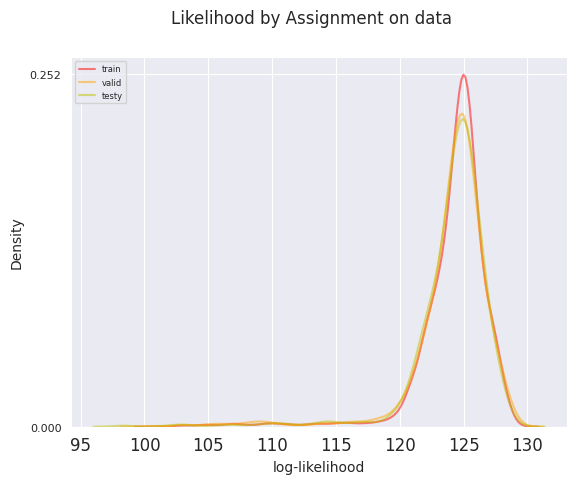

In [11]:
rs_list = [["train"], ["valid"], ["testy"]]
rs_list_t = [list(x) for x in zip(*rs_list)]

am.plot_likelihoods_multiple(ncrbm_likelihoods["likelihoods"], rs_list_t, rs_list_t, title=f"Likelihood by Assignment on data", xlim=None, legend_font_size=6)

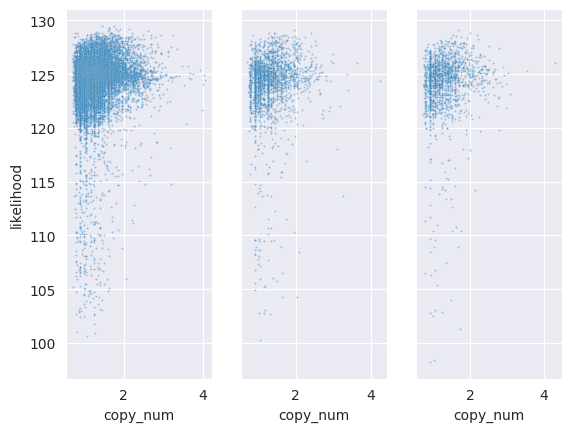

In [12]:
# Compare copy_num (Enrichment Value) vs Model Likelihood
fig, axs = plt.subplots(1, 3, sharey=True)
sns.scatterplot(data=all_data.loc[all_data["round"] == "train"], x="copy_num", y="likelihood", ax=axs[0], alpha=0.4, s=2.0)
sns.scatterplot(data=all_data.loc[all_data["round"] == "valid"], x="copy_num", y="likelihood", ax=axs[1], alpha=0.4, s= 2.0)
sns.scatterplot(data=all_data.loc[all_data["round"] == "testy"], x="copy_num", y="likelihood", ax=axs[2], alpha=0.4, s= 2.0)
plt.show()

### Compare to Raw Sequencing Data

In [13]:
raw_data = am.fetch_data([f"r{i}" for i in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]], directory="../data/raw_rounds/", assignment_function=None, threads=12, normalize_counts=True, alphabet="dna")

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw_rounds/r3.fasta'

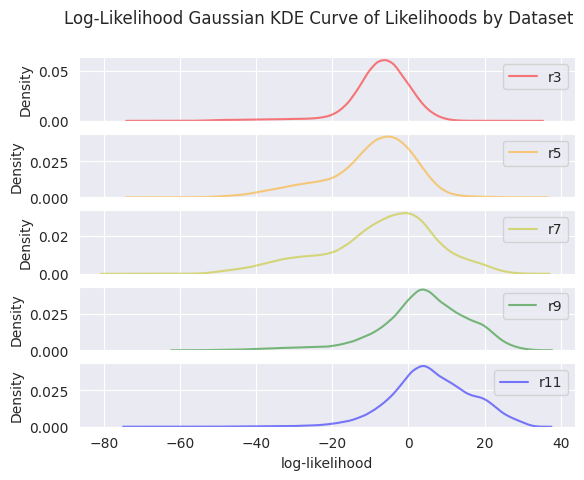

In [24]:
am.generate_likelihoods([f"r{i}" for i in [3, 5, 7, 9, 11]], eval_ncrbm, raw_data, f"cov_eval_raw_likelihoods")
ncrbm_raw_likelihoods = am.get_likelihoods("./generated/cov_eval_raw_likelihoods.json")


labels = [f"r{i}" for i in [3, 5, 7, 9, 11]]
weights = [raw_data[raw_data["round"] == l]["copy_num"].to_numpy() for l in labels]
am.plot_likelihoods(ncrbm_raw_likelihoods["likelihoods"], labels, labels, xlim=None, cdf=False, weights=None)

In [25]:
am.generate_likelihoods(["train", "valid", "testy"], eval_ncrbm, all_data, f"cov_likelihoods_eval")

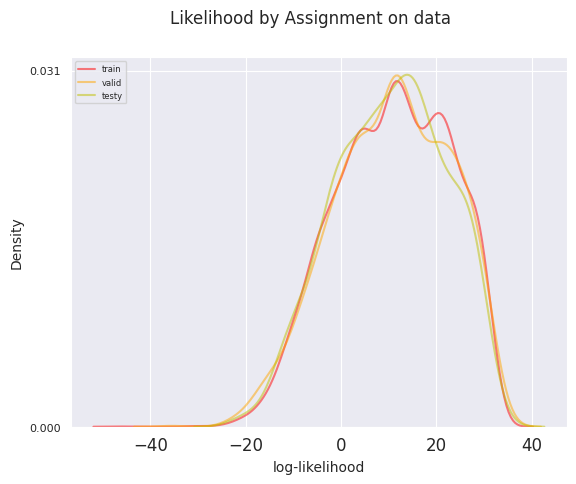

In [8]:
# read in generated likelihoods
eval_likelihoods = am.get_likelihoods("./generated/cov_likelihoods_eval.json")

from copy import copy
train_data["eval_likelihood"] = eval_likelihoods["likelihoods"]["train"]
val_data["eval_likelihood"] = eval_likelihoods["likelihoods"]["valid"]
test_data["eval_likelihood"] = eval_likelihoods["likelihoods"]["testy"]

all_data["eval_likelihood"] = -100
all_data.loc[all_data["round"] == "train", "eval_likelihood"] = eval_likelihoods["likelihoods"]["train"]
all_data.loc[all_data["round"] == "valid", "eval_likelihood"] = eval_likelihoods["likelihoods"]["valid"]
all_data.loc[all_data["round"] == "testy", "eval_likelihood"] = eval_likelihoods["likelihoods"]["testy"]


rs_list = [["train"], ["valid"], ["testy"]]
rs_list_t = [list(x) for x in zip(*rs_list)]

am.plot_likelihoods_multiple(eval_likelihoods["likelihoods"], rs_list_t, rs_list_t, title=f"Likelihood by Assignment on data", xlim=None, legend_font_size=6)

In [27]:
ads2 = all_data.sort_values("eval_likelihood", ascending=False, inplace=False)

In [28]:
ads2.head(500)

sequence  copy_num  round assignment  \
1827   AAGGAGGGTAGGTAGTGCTTGGTACGGAAACTCCGCCGAT  1.824406  train        N/A   
6465   AAGGAGTGTAGGTAGTGCTTGGTAGGGAAACTCCGCCGAT  1.275896  train        N/A   
2975   AAGGAGGGTAGGTAGTGCTTGGTAGTGAAACTCCGCCGAT  1.618881  train        N/A   
2308   AGGAGGGTAGGTAGTGCTTGGTAGGGAAACTCCACCGATT  1.718356  testy        N/A   
6516   AAGGAGGGTAGGTAGTTCTTGGTAGGGAAACTCCGCCGAT  1.266607  train        N/A   
...                                         ...       ...    ...        ...   
2671   TCGCGGTGGTAGGGTAGGCAGTGCAGCGGTCTTATGATCA  1.674921  train        N/A   
2827   AGGAGGGTAGGTAGTGCTTGGTAGGGAAACCCCGCCGATT  1.639772  train        N/A   
9216   GGGCGGGTAGGTAGTGCTTGGTAGGGAAACTCCGCCGATT  1.082648  train        N/A   
11221  ATGGGGGGCGGGTAGGTTATGGGGTCGTTTCTACAGTGGG  0.985190  train        N/A   
11486  GGGGGGGTTGGGTTGGGTATGGGGTCGTTTCTACAGTGGG  0.951613  train        N/A   

         eval_lik  eval_likelihood  
1827   237.997616        34.729767  
6465   237.937388        34.687805  
2975   237.935199        34.678955  
2308  -100.000000        34.542709  
6516   237.707055        34.426544  
...           ...              ...  
2671   233.099393        29.893799  
2827   233.064746        29.888962  
9216   233.053400        29.886032  
11221  233.049136        29.880814  
11486  232.990359        29.879684  

[500 rows x 6 columns]

# Clustering Data

In [13]:
from sklearn.decomposition import PCA
import pool.analysis.clustering_methods as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# train_vout = [x.detach().cpu() for x in ncrbm.sample_from_inputs_h(ncrbm.compute_output_v(amc.dataframe_to_input(all_data, ncrbm.alphabet, *ncrbm.v_num, ncrbm.q).to(ncrbm.device)), beta=1)]
train_vout = [x.detach().cpu() for x in ncrbm.compute_output_v(amc.dataframe_to_input(all_data, ncrbm.alphabet, *ncrbm.v_num, ncrbm.q).to(ncrbm.device))]

train_vout = torch.concat(train_vout, dim=1)


scaler = StandardScaler()
# X = scaler.fit_transform(train_vout.detach().numpy())
X = train_vout.detach().numpy()

In [30]:
train_vout[0]

tensor([9.9973e+00, 1.1617e+00, 8.6180e+00, 5.7060e+00, 1.1275e+01, 1.1089e+01,
        5.7921e+00, 1.4242e+01, 5.3650e+00, 5.2948e+00, 6.6429e+00, 3.6128e+00,
        1.3819e+01, 6.7946e+00, 8.5795e+00, 8.7155e+00, 3.0431e+00, 4.1648e+00,
        6.2164e+00, 3.1811e+00, 7.6806e-01, 1.2784e+01, 4.0939e+00, 1.8520e+01,
        1.9682e-01, 5.1860e+00, 1.3753e+00, 4.1926e+00, 6.8946e+00, 5.6056e+00,
        1.1137e+01, 3.0467e+00, 4.3227e+00, 8.2585e+00, 8.3733e-01, 2.7329e+00,
        2.5349e+00, 5.3570e-01, 1.2874e+01, 7.6688e+00, 1.8170e+00, 5.3416e+00,
        1.2457e+01, 6.9031e+00, 3.9430e+00, 1.1389e+01, 3.8382e-01, 2.6013e+00,
        2.2302e+00, 1.1353e+00, 2.4281e+00, 5.2222e+00, 3.6782e+00, 5.8336e-03,
        9.5294e+00, 1.0127e+01, 1.3435e+01, 1.3452e+00, 6.1540e+00, 2.9373e-02,
        9.5225e+00, 4.7639e+00, 6.8415e+00, 3.0238e+00, 2.0055e+00, 5.9999e+00,
        8.7002e+00, 5.3244e+00, 1.0763e+01, 8.2660e+00, 2.2158e-02, 6.5504e+00,
        5.9985e+00, 5.3179e+00, 1.3578e+

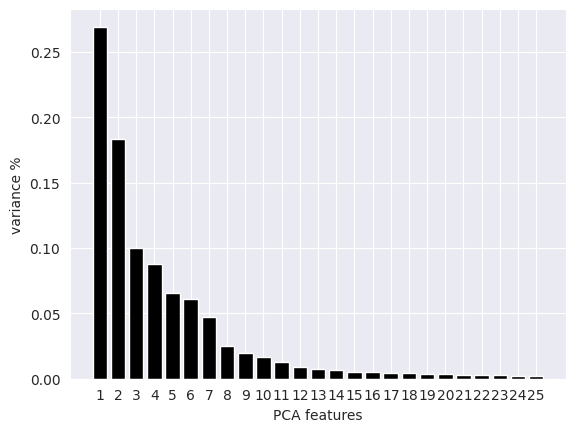

In [15]:
cm.pca_component_check(X, components=25)

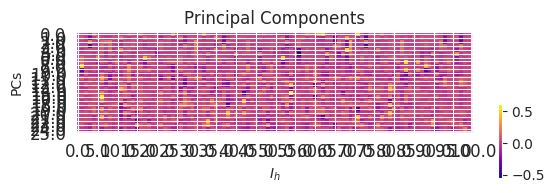

In [14]:
pca = PCA(n_components=25)
principal_components = pca.fit_transform(X)
PCA_components_pd = pd.DataFrame(principal_components)
components = pca.components_
cm.view_components(components)

/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 179, in where
KeyboardInterrupt: 
/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto

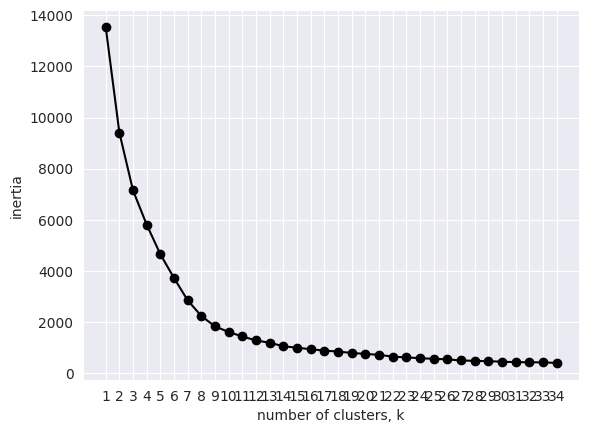

In [15]:
from sklearn.cluster import KMeans

ks = range(1, 35)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(principal_components)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [16]:
# Elbow Point is at 5 so we will run it for 5 clusters
clusters = 40
dataset = all_data
kmeans_pca = KMeans(n_clusters=clusters, init="k-means++", random_state=38)
kmeans_pca.fit(principal_components)
# Add principal components to dataframe
df_pca_kmeans = pd.concat([dataset.reset_index(drop=True), pd.DataFrame(principal_components)], axis=1)
pcs = principal_components.shape[1]
df_pca_kmeans.columns.values[-pcs:] = [f"Component {i}" for i in range(1, pcs+1)]
# Add labels from kmeans
df_pca_kmeans["K-mean PCA Label"] = kmeans_pca.labels_
# Replace integer with label in new column
df_pca_kmeans["Segment"] = df_pca_kmeans["K-mean PCA Label"].map({i:i+1 for i in range(clusters)})

/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


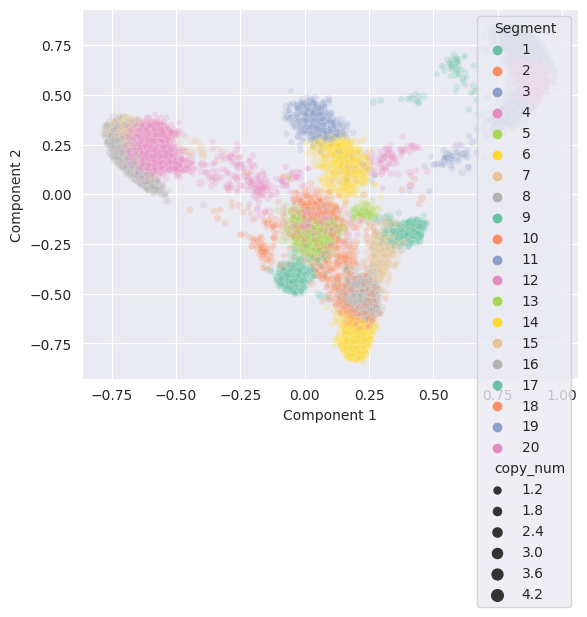

In [24]:
sns.scatterplot(data=df_pca_kmeans, x="Component 1", y="Component 2", hue="Segment", size="copy_num", alpha=0.2, s=0.1, palette="Set2")
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

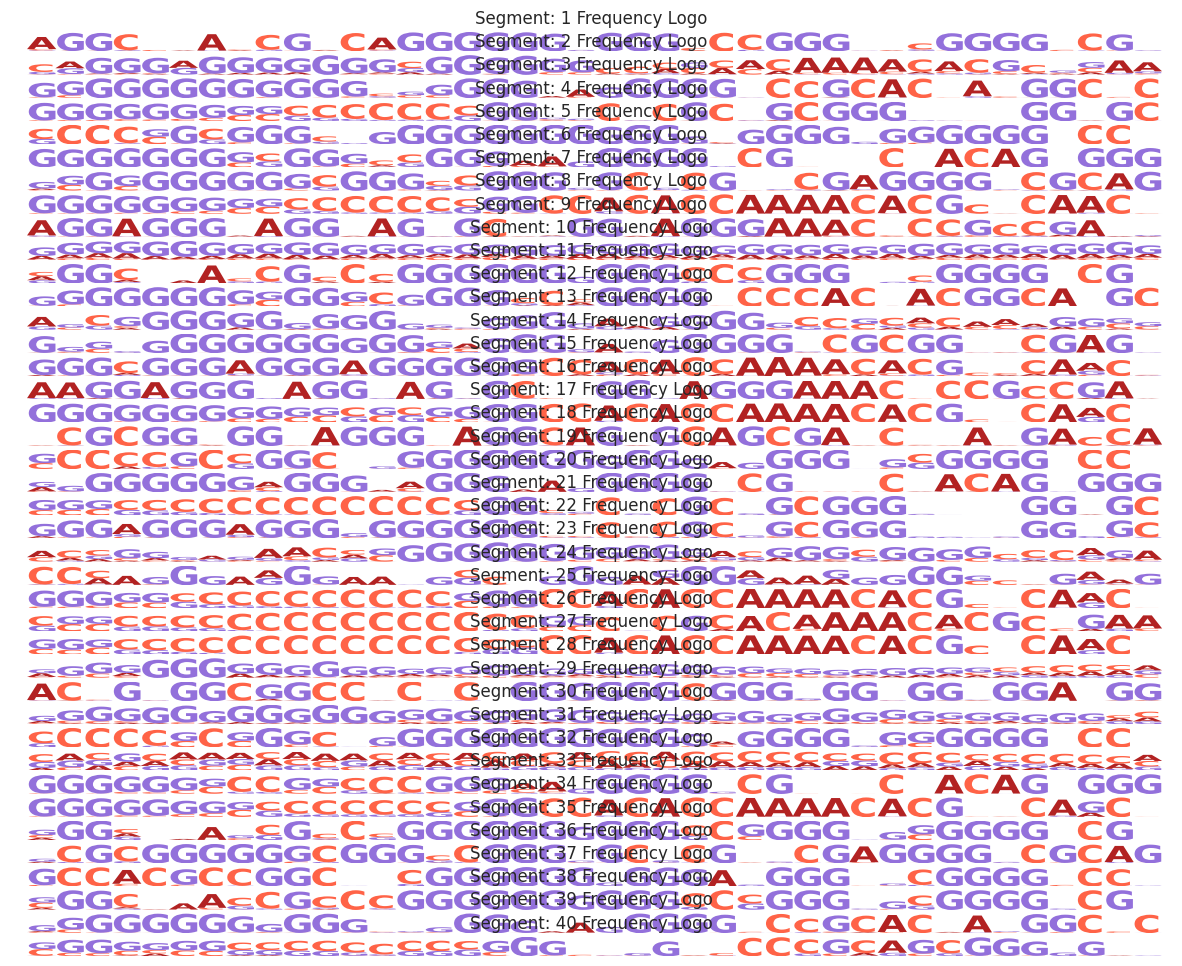

In [36]:
segments = [i for i in range(1, clusters+ 1)]

# Seq Logo showing Frequency of Each Nucleotide at each position
fig, axs = plt.subplots(len(segments), 1)
fig.set_size_inches(15, 12)

for rid, r in enumerate(segments):
    am.seq_logo(df_pca_kmeans[df_pca_kmeans["Segment"] == r], alphabet='dna', ax=axs[rid])
    axs[rid].axis("off")
    axs[rid].set_title(f"Segment: {r} Frequency Logo")


plt.show()

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Log Enrichment')]

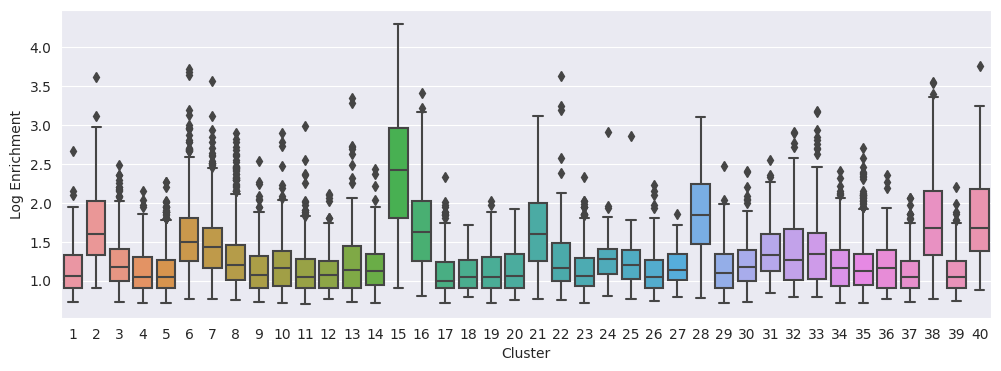

In [19]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df_pca_kmeans, x="Segment", y="copy_num").set(xlabel='Cluster', ylabel='Log Enrichment')

In [43]:
from sklearn.metrics import pairwise_distances_chunked

# find the closest sequence to the cluster centers
def calc_nn_to_cluster(cluster_center, X, threshold_1=0.15, threshold_2=0.25):
    def reduce_func(D_chunk, start):
        # neigh1 = np.asarray(D_chunk <= threshold_1).sum(1)
        Dc = np.asarray(D_chunk[0])
        ind = np.argmin(Dc) + start
        dist = np.min(Dc)
        return [ind], [dist]

    gen = pairwise_distances_chunked(cluster_center.reshape(1, -1), X, reduce_func=reduce_func, metric="euclidean")

    inds, dists = [], []
    for n1, n2 in gen:
        inds += n1
        dists += n2

    min_ind = inds[np.argmin(dists)]

    return min_ind

In [89]:
seqs = []
for i in range(clusters):
    mi = calc_nn_to_cluster(kmeans_pca.cluster_centers_[i], principal_components)
    seqs.append(df_pca_kmeans.iloc[mi,:].sequence)

stokens = pool.utils.seq_utils.create_tokens(seqs, token_function=pool.utils.seq_utils.tokenize, k=5)
stokens = [set(s) for s in stokens]

In [93]:
seqs

['GGGGGCCCCCCCCCGGGCCCACACCAAAACACGTTCAGCT',
 'CCCCGGGGGCGTGGGGGGGGGGGGTGGGGTGGGGGGTCCT',
 'GAGGGGGGTGGGTTGGGTATGGGGTCGTTTCTACAGTGGG',
 'GGGGGTGGGCCGCCCCGGTTCTCGCTGCGGGTTTTGGTGC',
 'TGGGTTACCGCCTGGGGGGGGGGCCCGGGTTGGGGGTCGT',
 'AGGAGGGTAGGTAGTGCTTGGTAGGGAAACCCCGGCGATT',
 'TCGCGGGGGGGGGGCCGGGTGCTCGTTCGAGGGGTCGCGG',
 'GGGGGGGGTGGGGTGGGGTATGGGGTCCGCACTATGGCTC',
 'AGGGTAGGACAGGTGCCAGGTTAGTTAGTAAGGTTAGGTA',
 'TGTTGGGGGGGGGGCTGGGTATGGGGGTCGCGGTTCGAGT',
 'GGGAGGGAGGTAGGGGGGCCACACCAAAACACGTTCAACT',
 'GGGGGGCGCGCCCCGGGAAGGGGGTCGTTTCTACAGTGGG',
 'GGGAGGGAGTGTGGGGGGTTCTCGCTTCGGGTTTTGGTGC',
 'GGGGGGGGCGGGCGGGGCACGGGGTCCCACTACGGCATGC',
 'CCCATGGTAGGTATTGCTTGGAAGGGATAGTGGGCTTGAT',
 'GCCCCGCCGGCTTGGGGGGGTGGGTGGGGTGCGGGGTCCT',
 'GCCGCCCCCCCCCCCCGGTACTCGCTGCGGGTTTTGGTGC',
 'CCCGTTTGAACACGGGGGGGGGGCATGGGCGGGGTCCAGA',
 'GGGCGGGCGGCCGCCGGGCCACACCAAAACACGTTCAACT',
 'CGGCGCCCCCCCCCCCCCCCCTCGCACAAAACACGCTGAA',
 'CCCCCGCGGGCTCGGGGGGGGGGGTGGGGTGCGGGGTCCT',
 'GGGGGGGGGGGGGGGGTTGGGGGGTTTGGGGGGCGGGCAA',
 'GGGGGGCG

In [97]:
set(stokens[0]) & set(stokens[8])

set()

In [96]:
stokens[1]

{'CCCCG',
 'CCCGG',
 'CCGGG',
 'CGGGG',
 'CGTGG',
 'GCGTG',
 'GGCGT',
 'GGGCG',
 'GGGGC',
 'GGGGG',
 'GGGGT',
 'GGGTC',
 'GGGTG',
 'GGTCC',
 'GGTGG',
 'GTCCT',
 'GTGGG',
 'TGGGG'}

In [90]:
from SetSimilaritySearch import all_pairs, SearchIndex

def calculate_pair_distances_lsh(tokens, similarity_function="jaccard", similarity_threshold=0.1):
    """calculate pairwise distances of all sequences in dataframe using lsh scheme and return distance matrix"""
    pairs = all_pairs(tokens, similarity_func_name=similarity_function, similarity_threshold=similarity_threshold)
    sim_mat = np.zeros((len(tokens), len(tokens)))
    sep = [*zip(*pairs)]
    # make symmetric distance matrix
    sim_mat[tuple(sep[:-1])] = sep[-1]
    sim_mat[tuple(sep[-2::-1])] = sep[-1]
    return 1. / (sim_mat + sim_mat[np.nonzero(sim_mat)].min())

In [102]:
rescaled_pdists

array([[1.        , 0.09316533, 0.45868946, ..., 0.17211329, 0.07101821,
        0.16474338],
       [0.09316533, 1.        , 0.06351218, ..., 0.0164243 , 0.06351218,
        0.06882308],
       [0.45868946, 0.06351218, 1.        , ..., 0.02825726, 0.21227197,
        0.05021586],
       ...,
       [0.17211329, 0.0164243 , 0.02825726, ..., 1.        , 0.05701346,
        0.04388084],
       [0.07101821, 0.06351218, 0.21227197, ..., 0.05701346, 1.        ,
        0.07862036],
       [0.16474338, 0.06882308, 0.05021586, ..., 0.04388084, 0.07862036,
        1.        ]])

/home/jonah/PycharmProjects/pool_harmonium/venv/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='X', ylabel='Y'>

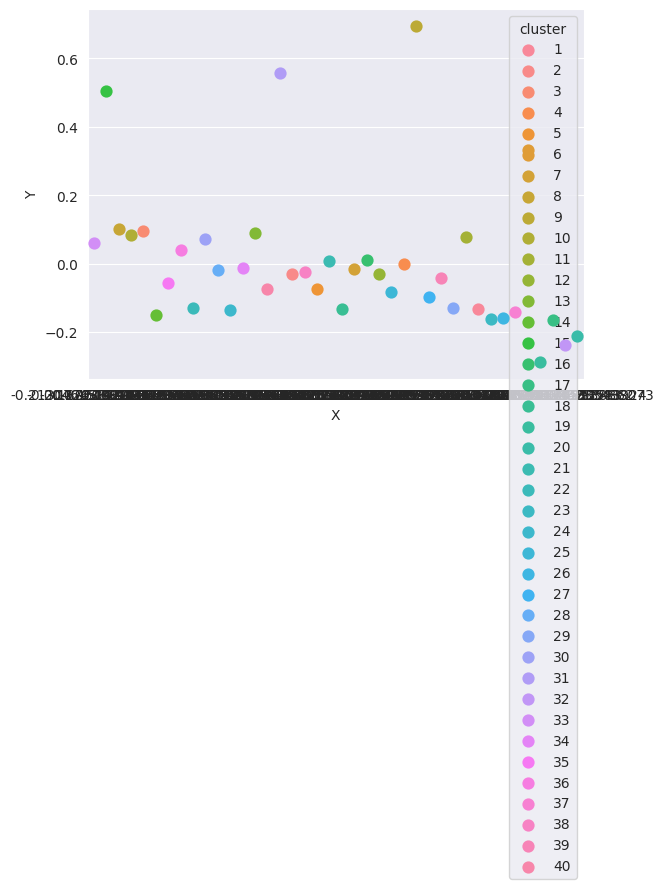

In [105]:
from sklearn.manifold import MDS
from sklearn.preprocessing import QuantileTransformer

pdists = calculate_pair_distances_lsh(stokens, similarity_threshold=0.0)
mds = MDS(dissimilarity='precomputed')

# Get the dissim matrix
# pdists = np.abs(1-pdists/pdists[0][0])
# rescale to 0-1
rmin = np.min(pdists)
rmax = np.max(pdists)
tmin = 0.
tmax = 1.

rescaled_pdists = (pdists - rmin)/(rmax-rmin) * (tmax-tmin) + tmin
np.fill_diagonal(rescaled_pdists, 0.)
rescaled_pdists = np.where(rescaled_pdists == 1., np.max(rescaled_pdists)+0.05, rescaled_pdists)
mdsX = mds.fit_transform(rescaled_pdists)

clustids = [i+1 for i in range(clusters)]
clustDist = pd.DataFrame({"X": mdsX[:, 0], "Y": mdsX[:, 1], "cluster": clustids})

sns.pointplot(data=clustDist, x="X", y='Y', hue="cluster")

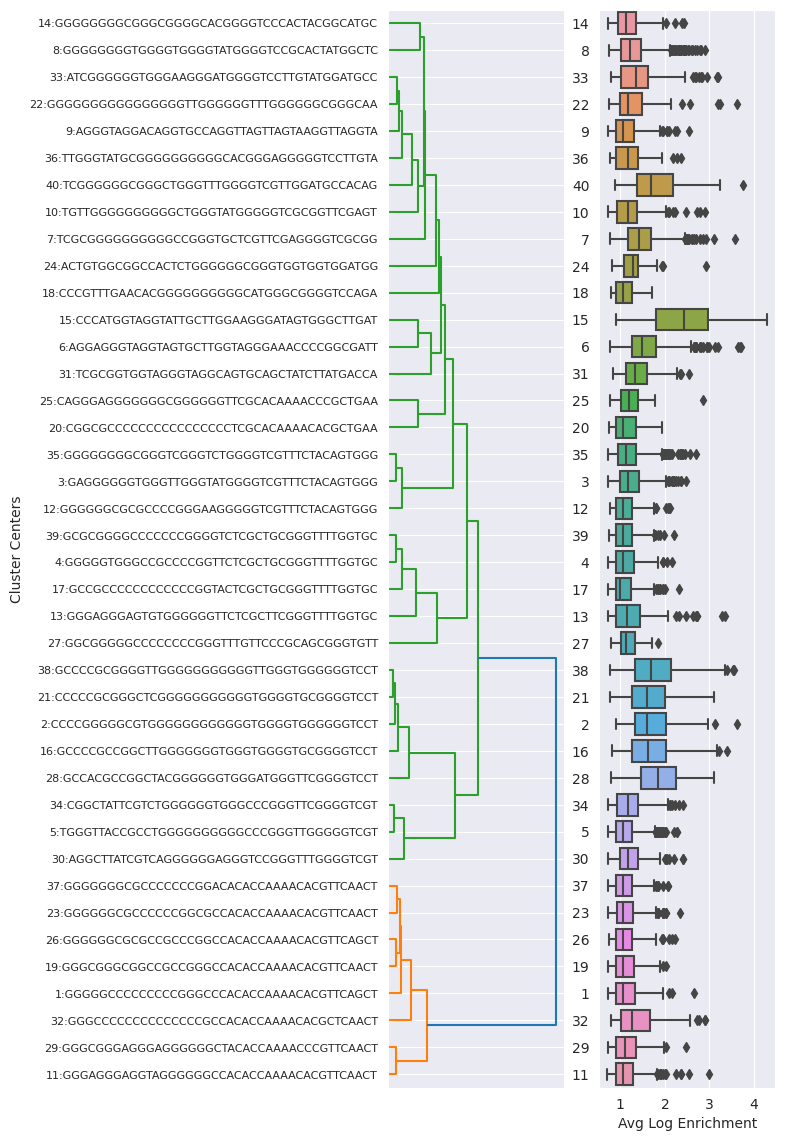

In [174]:
import scipy.cluster.hierarchy as shc
fig, axs = plt.subplots(1, 2, figsize=(5, 14))
dendro = shc.dendrogram(shc.linkage(kmeans_pca.cluster_centers_, method="ward", metric="euclidean"), labels=[f"{sid+1}:{s}" for sid, s in enumerate(seqs)], orientation='right', distance_sort=True, ax=axs[0])

axs[0].set_xlabel(None)
axs[0].set_ylabel("Cluster Centers")
axs[0].set_xticks([], [])

od = [int(x.split(':')[0]) for x in dendro['ivl']]
od.reverse()

# od = np.asarray(od)
# df_pca_kmeans["sort_count"] = od[df_pca_kmeans["Segment"]-1]
#
# odpd = df_pca_kmeans.groupby(["Segment"]).apply(lambda g:g.sort_values("sort_count", ascending=False)).index

# fig = plt.figure(figsize=(5, 20))
sns.boxplot(data=df_pca_kmeans, x="copy_num", y="Segment", orient='h', order=od, ax=axs[1]).set(xlabel='Avg Log Enrichment', ylabel=None)
plt.show()


In [155]:
(df_pca_kmeans['Segment'] == od[1]).sum()

1212

In [138]:
df_pca_kmeans

sequence  copy_num  round assignment  \
0      CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG  4.297475  testy        N/A   
1      CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGGTG  4.238403  valid        N/A   
2      CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGCTG  4.057590  train        N/A   
3      CCATTGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG  4.028253  train        N/A   
4      CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGAT  4.017087  train        N/A   
...                                         ...       ...    ...        ...   
14709  GGGCGGCGCCCCGCGGGGCCACACCAAAACACGTTCAACT  0.717437  train        N/A   
14710  CGGCTTATGGTCCGGGGGGGGGGGCCGGGTGCGGGGTCGT  0.717437  valid        N/A   
14711  GGGCGGGAGGGAGGGGGGCCACACCGAAACACGTTCAGCT  0.714356  train        N/A   
14712  GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAGCT  0.707206  train        N/A   
14713  GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAGCC  0.704572  train        N/A   

       likelihood                                     likelihood_ind  \
0      126.053963  [1.8250174522399902, 1.9763931035995483, 2.021...   
1      124.362740  [1.8414816856384277, 2.104931354522705, 1.9555...   
2      124.496513  [1.8340762853622437, 2.1689367294311523, 2.018...   
3      124.947014  [1.7918469905853271, 1.8678210973739624, 1.928...   
4      124.089027  [1.844008207321167, 2.1041808128356934, 1.9558...   
...           ...                                                ...   
14709  123.018440  [1.7538477182388306, 2.0292227268218994, 1.784...   
14710  126.114632  [2.988731861114502, 2.0175328254699707, 3.0600...   
14711  125.879555  [1.945605754852295, 2.2273471355438232, 1.8143...   
14712  127.790321  [1.8921775817871094, 2.139814615249634, 1.7877...   
14713  126.546013  [1.892145037651062, 2.1751067638397217, 1.7877...   

       Component 1  Component 2  Component 3  Component 4  ...  Component 18  \
0        -0.082939     0.217330    -0.051313     0.050771  ...     -0.038880   
1        -0.093202     0.220117    -0.021598     0.062984  ...     -0.045745   
2        -0.082065     0.213213    -0.035094     0.058234  ...     -0.037054   
3        -0.080801     0.200419    -0.041927     0.048512  ...     -0.069513   
4        -0.077731     0.221546    -0.057740     0.058865  ...     -0.017622   
...            ...          ...          ...          ...  ...           ...   
14709     1.390519    -0.257357    -0.070019    -0.070026  ...      0.014081   
14710    -0.393321    -0.495266     0.267436    -0.508029  ...      0.020142   
14711     0.988574    -0.092517    -0.078602    -0.065736  ...     -0.071705   
14712     1.315880    -0.181776    -0.117404    -0.097277  ...     -0.092956   
14713     1.151472    -0.129668    -0.100788    -0.083212  ...     -0.073282   

       Component 19  Component 20  Component 21  Component 22  Component 23  \
0         -0.002020      0.244631     -0.201939     -0.133219      0.619630   
1         -0.000845      0.237989     -0.179549     -0.119150      0.597820   
2         -0.007081      0.230994     -0.188567     -0.122589      0.585148   
3         -0.020677      0.226125     -0.199629     -0.124642      0.600426   
4          0.002434      0.232221     -0.196957     -0.132222      0.606440   
...             ...           ...           ...           ...           ...   
14709      0.020539      0.029470      0.044627     -0.006633      0.025268   
14710     -0.001453      0.010635     -0.001360      0.005411      0.009395   
14711     -0.023789      0.012004      0.007816     -0.082608     -0.026113   
14712     -0.009886      0.009072      0.024701     -0.093147     -0.005318   
14713     -0.003627      0.043411      0.028697     -0.078139     -0.006076   

       Component 24  Component 25  K-mean PCA Label  Segment  
0          0.355554     -0.223191                14       15  
1          0.337381     -0.205984                14       15  
2          0.342599     -0.200270                14       15  
3          0.348492     -0.160872                14       15  


In [125]:
dendro['ivl']

['10:GGGAGGGAGGTAGGGGGGCCACACCAAAACACGTTCAACT',
 '28:GGGCGGGAGGGAGGGGGGCTACACCAAAACCCGTTCAACT',
 '31:GGGCCCCCCCCCCCCCCGCCACACCAAAACACGCTCAACT',
 '0:GGGGGCCCCCCCCCGGGCCCACACCAAAACACGTTCAGCT',
 '18:GGGCGGGCGGCCGCCGGGCCACACCAAAACACGTTCAACT',
 '25:GGGGGGCGCGCCGCCCGGCCACACCAAAACACGTTCAGCT',
 '22:GGGGGGCGCCCCCCGGCGCCACACCAAAACACGTTCAACT',
 '36:GGGGGGGCGCCCCCCCGGACACACCAAAACACGTTCAACT',
 '29:AGGCTTATCGTCAGGGGGGAGGGTCCGGGTTTGGGGTCGT',
 '4:TGGGTTACCGCCTGGGGGGGGGGCCCGGGTTGGGGGTCGT',
 '33:CGGCTATTCGTCTGGGGGGTGGGCCCGGGTTCGGGGTCGT',
 '27:GCCACGCCGGCTACGGGGGGTGGGATGGGTTCGGGGTCCT',
 '15:GCCCCGCCGGCTTGGGGGGGTGGGTGGGGTGCGGGGTCCT',
 '1:CCCCGGGGGCGTGGGGGGGGGGGGTGGGGTGGGGGGTCCT',
 '20:CCCCCGCGGGCTCGGGGGGGGGGGTGGGGTGCGGGGTCCT',
 '37:GCCCCGCGGGGTTGGGGGGGGGGGTTGGGTGGGGGGTCCT',
 '26:GGCGGGGGCCCCCCCCGGGTTTGTTCCCGCAGCGGGTGTT',
 '12:GGGAGGGAGTGTGGGGGGTTCTCGCTTCGGGTTTTGGTGC',
 '16:GCCGCCCCCCCCCCCCGGTACTCGCTGCGGGTTTTGGTGC',
 '3:GGGGGTGGGCCGCCCCGGTTCTCGCTGCGGGTTTTGGTGC',
 '38:GCGCGGGGCCCCCCCGGGGTCTCGCTGCGGGTTTTGGTG

In [33]:
# df_pca_kmeans[df_pca_kmeans["Segment"] == 11]
df_pca_kmeans.iloc[13413]

sequence                     GGGGGCCCCCCCCCGGGCCCACACCAAAACACGTTCAGCT
copy_num                                                     0.908115
round                                                           train
assignment                                                        N/A
likelihood                                                  121.24836
likelihood_ind      [1.7124907970428467, 1.9682332277297974, 1.733...
Component 1                                                  1.371529
Component 2                                                 -0.264994
Component 3                                                 -0.035245
Component 4                                                 -0.033413
Component 5                                                  0.109061
Component 6                                                  -0.04069
Component 7                                                   0.01601
Component 8                                                 -0.083416
Component 9         

In [62]:
train_vout[df_pca_kmeans["Segment"] == 24].mean(0)

tensor([0.0429, 0.0806, 0.0763, 0.0414, 0.1872, 0.2937, 0.8615, 0.2067, 0.1132,
        0.0447, 0.0568, 0.0524, 0.0578, 0.0624, 0.0215, 0.0654, 0.0201, 0.0764,
        0.0380, 0.0964, 0.2643, 0.1839, 0.0277, 0.2333, 0.0424, 0.0997, 0.0698,
        0.1804, 0.0388, 0.0633, 0.0224, 0.0588, 0.0987, 0.0661, 0.0429, 0.0384,
        0.0134, 0.0134, 0.1383, 0.2484, 0.0298, 0.1024, 0.2042, 0.0056, 0.0327,
        0.0665, 0.1153, 0.0298, 0.0646, 0.0483, 0.0347, 0.0000, 0.0792, 0.0818,
        0.0689, 0.0145, 0.0339, 0.1034, 0.1151, 0.3045, 0.0596, 0.0479, 0.0494,
        0.1108, 0.0545, 0.1331, 0.0538, 0.0959, 0.0960, 0.0664, 0.0435, 0.0649,
        0.0994, 0.0934, 0.0117, 0.0466, 0.0685, 0.1341, 0.0703, 0.1498, 0.0157,
        0.1170, 0.0542, 0.0551, 0.1073, 0.0637, 0.0307, 0.0426, 0.0849, 0.0515,
        0.0807, 0.0674, 0.0491, 0.0031, 0.1564, 0.1027, 0.0450, 0.1134, 0.1568,
        0.0649])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


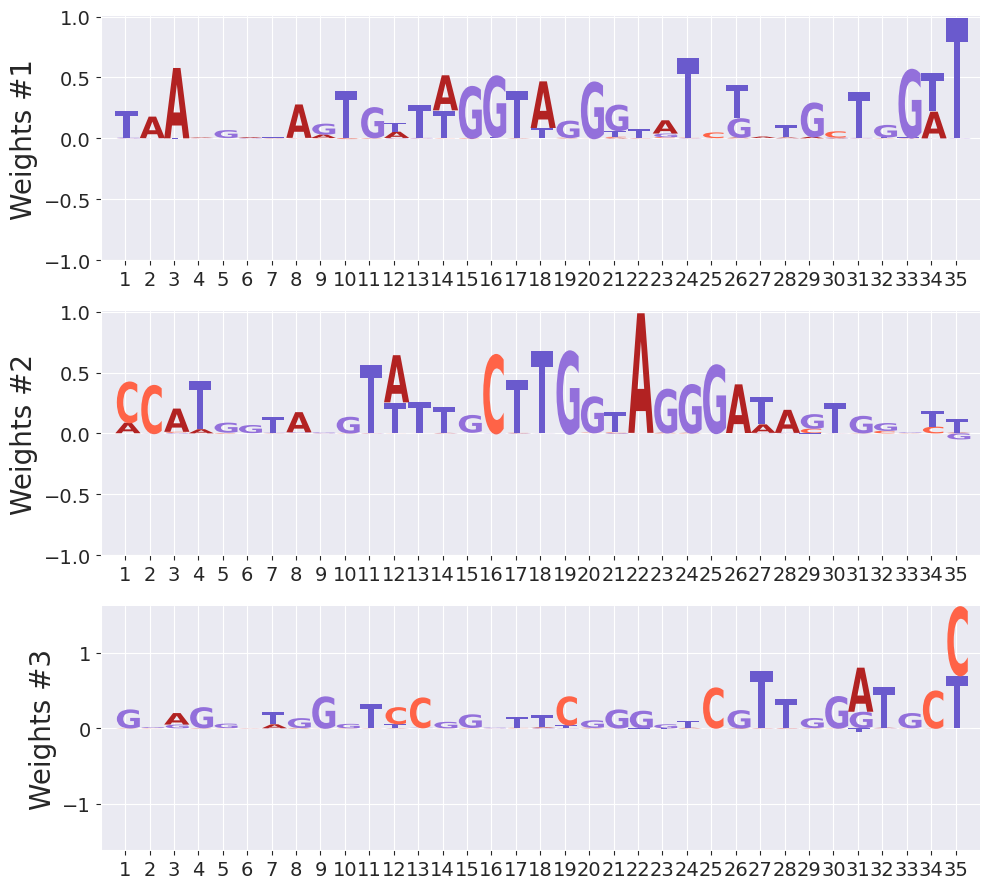

In [65]:
am.view_weights_crbm(ncrbm, ncrbm.hidden_convolution_keys[0], sort="unordered", selected=[5, 6, 54], alphabet="dna")

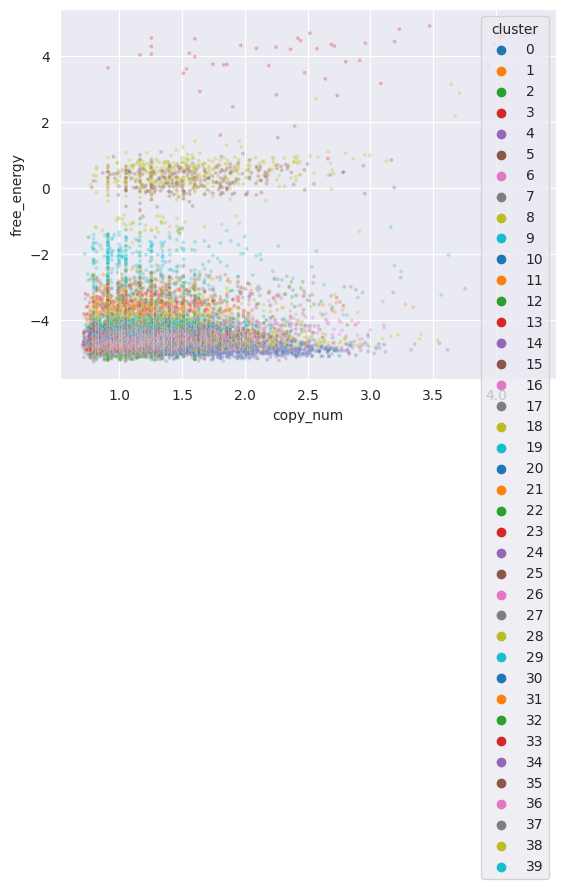

In [52]:
#from rbm_torch.utils.utils import extract_cluster_crbm_pool

segment = 24
# remove = np.where(components[component-1] < 0.2)[0].tolist()
# beta, W = model_utils.get_beta_and_W(ncrbm, hidden_key=ncrbm.hidden_convolution_keys[0])
# order = np.argsort(beta)[::-1]

train_ind = np.asarray(all_data["likelihood_ind"].to_list())

# remove = [0, 5, 15, 21, 28, 41, 47]

# fixed_likeli = np.dot(train_ind, components[component])
fixed_likeli = (train_ind * np.dot(kmeans_pca.cluster_centers_[segment-1][None, :], components)).sum(axis=1)
# for r in remove:
#     fixed_likeli -= train_ind[:, r]  #train_ind[:, order[r]]

# fig, ax = plt.subplots(1, 1)
# plt.scatter(train_data.copy_num.to_list(), fixed_likeli, s=1, c=np.array(am.supported_colors)[kmeans_pca.labels_])
tmp_df = pd.DataFrame({"sequence": all_data["sequence"].to_list(), "copy_num": all_data.copy_num.to_list(), "free_energy": fixed_likeli.tolist(), "cluster": kmeans_pca.labels_.tolist()})
sns.scatterplot(data=tmp_df, x="copy_num", y="free_energy", hue="cluster",  palette="tab10", s=8, alpha=0.3)
plt.show()
# plt.legend(kmeans_pca.labels_.tolist())
# plt.ylabel("Free Energy")
# plt.xlabel("Average Log Enrichment")

In [53]:
kmeans_pca.cluster_centers_[segment-1]

array([ 0.04483571, -0.1447525 ,  0.00861854, -0.3474573 ,  0.5338866 ,
       -0.16312693, -0.38995266, -0.13502276,  0.20813115,  0.10191214,
        0.15204254,  0.22025226, -0.07343043, -0.11325448,  0.21876734,
       -0.10013259, -0.21177743, -0.05227759,  0.00209829,  0.04714535,
       -0.02494287, -0.28141984,  0.0866577 ,  0.33560613, -0.00076055],
      dtype=float32)

In [21]:
from rbm_torch.utils import data_prep as dp

os.mkdir("../clusters/")
os.mkdir("../clusters/configs/")
os.mkdir("../clusters/trained_crbms")

for i in range(clusters):
    seqs = tmp_df[tmp_df["cluster"] == i]["sequence"].tolist()
    cn = tmp_df[tmp_df["cluster"] == i]["copy_num"].tolist()
    dp.write_fasta(seqs, cn, f"../clusters/cluster{i}.fasta")


In [6]:
# os.mkdir("../clusters/configs/")
# os.mkdir("../clusters/trained_crbms")

ci = 7
clust_config = config
clust_config["fasta_file"] = '../clusters/cluster7.fasta'
clust_config["convolution_topology"]["hidden_25"]["number"] = 10
clust_config["epochs"] = 500

clust_run_data = run_data
clust_run_data['fasta_file'] = f'cluster{ci}.fasta'
clust_run_data['data_dir'] = '../clusters/'
clust_run_data['server_model_dir'] = '../clusters/trained_crbms/'
clust_run_data['local_model_dir'] = '/mnt/D1/globus/cov_trained_crbms/'
clust_run_data['model_name'] = f'pcrbm_relu_cluster{ci}'

clust_run_data['config'] = clust_config

run, con = utils.load_run(clust_run_data)

In [ ]:
from train import train

train(run)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ../clusters/trained_crbms/pcrbm_relu_cluster7


Process Time 0.0018062591552734375


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name   | Type      | Params
-------------------------------------
0 | kl_div | KLDivLoss | 0     
-------------------------------------
2.2 K     Trainable params
20        Non-trainable params
2.2 K     Total params
0.009     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 50/50 [00:06<00:00,  7.97it/s, v_num=0, ptl/free_energy_diff_step=-11.8, ptl/train_free_energy_step=-31.6, ptl/train_loss_step=-7.39]
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 50/50 [00:06<00:00,  8.27it/s, v_num=0, ptl/free_energy_diff_step=-12.2, ptl/train_free_energy_step=-45.8, ptl/train_loss_step=-7.37, ptl/val_free_energy=-30.3, ptl/free_energy_diff_epoch=-10.2, ptl/train_free_energy_epoch=-20.2, ptl/train_loss_epoch=nan.0]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 50/50 [00:05<00:00,  8.39it/s, v_num=0, ptl/free_energy_diff_step=-10.7, ptl/train_free_energy_step=-62.4, ptl/train_loss_step=-6.51, ptl/val_free_energy=-44.3, ptl/free_energy_diff_epoch=-11.9, ptl/train_free_energy_epoch=-38.2, ptl/train_loss_epoch=nan.0]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 50/50 [00:06<00:00,  8.33it/s, v_num=0, ptl/free_energy_diff_step=-11.3, ptl/train_free_energy_step=-75.1, ptl/train_loss_step=-5.74, ptl/val_free_energy

In [8]:
# Directory of Stored CRBMs
mdir = "/home/jonah/PycharmProjects/phage_display_ML/datasets/cov/clusters/trained_crbms/"

rounds = [run["model_name"]]

train_fastas = run["fasta_file"]
if type(train_fastas) is list:
    data_keys = [x.split(".")[0] for x in train_fastas]
else:
    data_keys = [train_fastas.split(".")[0]]
### Load CRBM
# Get's checkpoint and directory for latest version of the trained model
checkp, version_dir = am.get_checkpoint_path(rounds[0], rbmdir=mdir)  #, version=25)

# load crbm
c7_crbm = pool_CRBM_relu.load_from_checkpoint(checkp)
c7_crbm.eval()

pool_CRBM_relu(
  (kl_div): KLDivLoss()
)

In [14]:
c7_data = am.fetch_data(data_keys, dir="../clusters/", molecule='dna')
c7_data.head()

Process Time 0.0026650428771972656


sequence  copy_num     round assignment
0  CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGGTG  4.238403  cluster7        N/A
1  CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGCTG  4.057590  cluster7        N/A
2  CCATTGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG  4.028253  cluster7        N/A
3  CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGAT  4.017087  cluster7        N/A
4  CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGCTTGATG  3.983772  cluster7        N/A

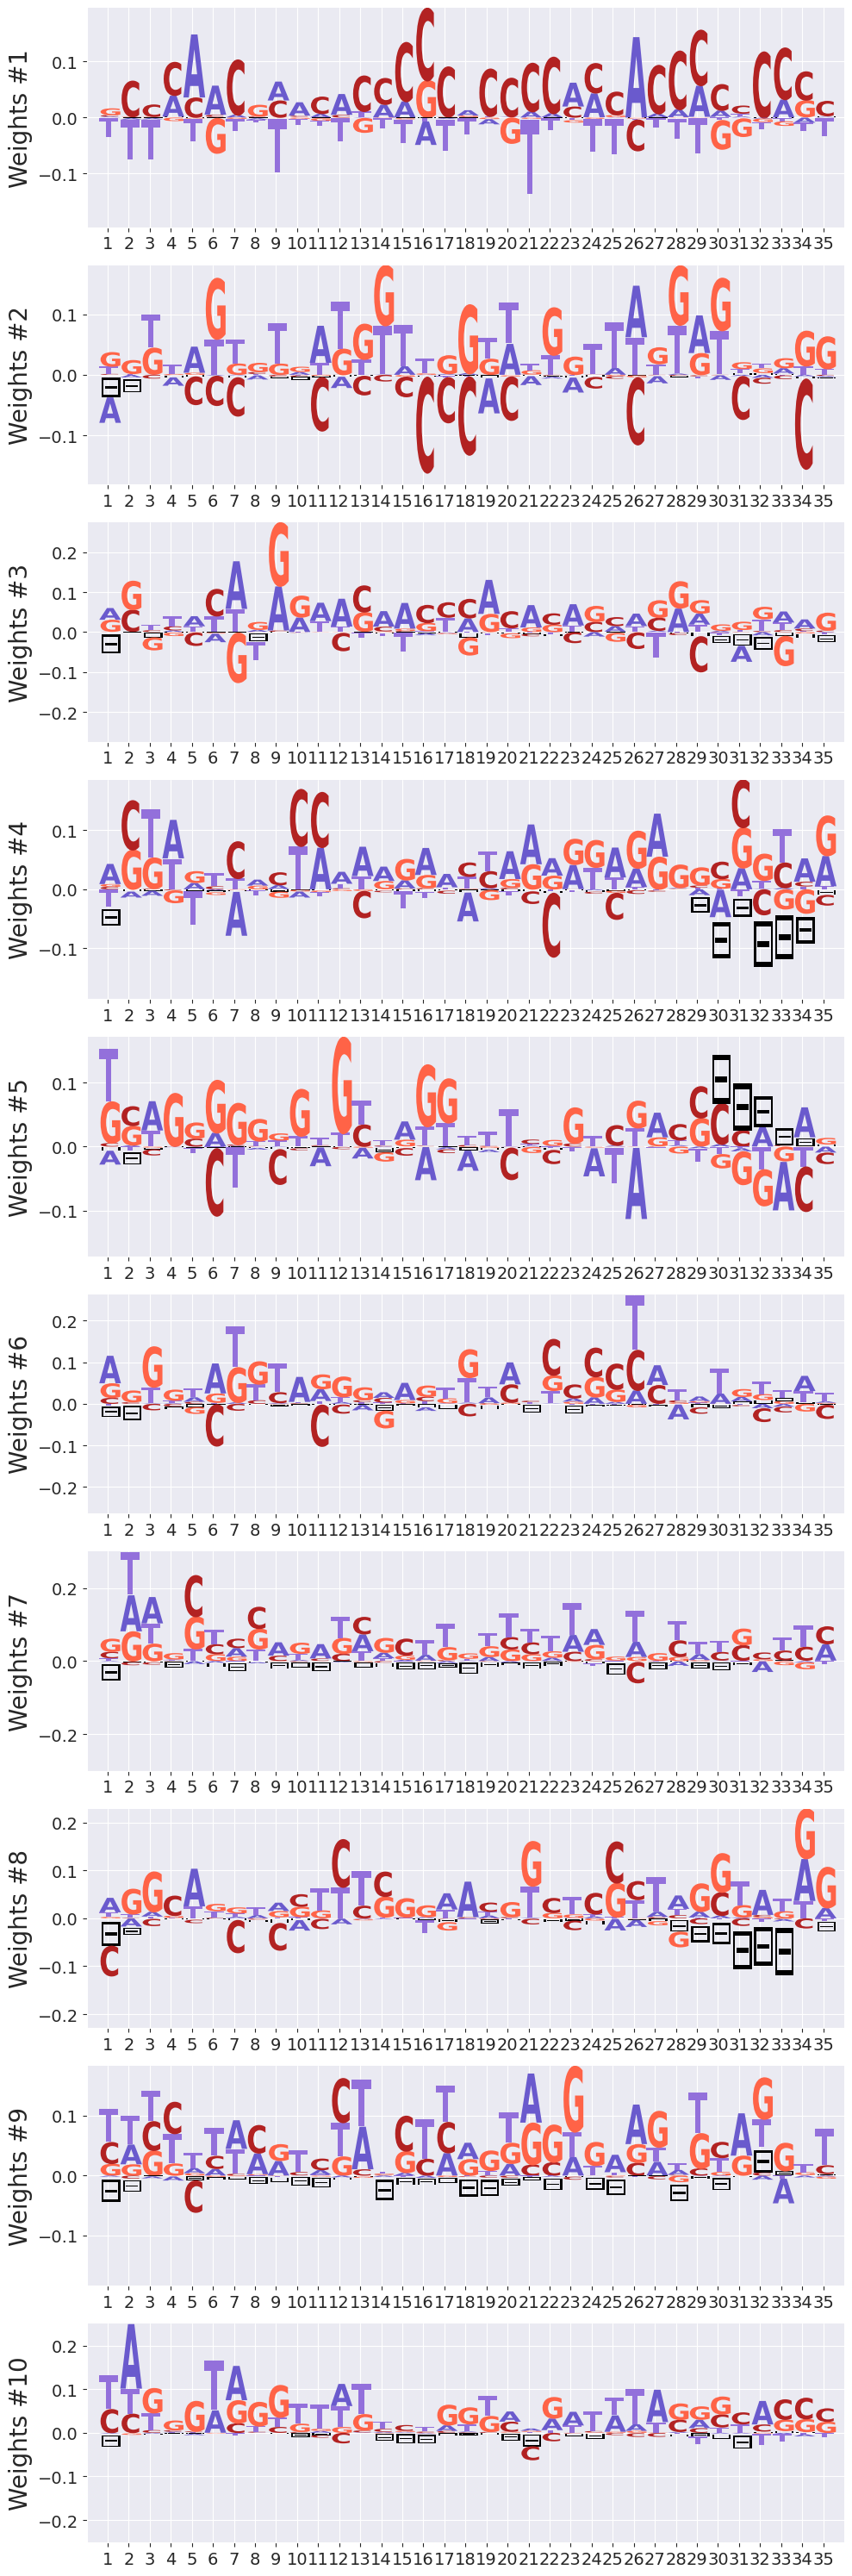

In [13]:
am.view_weights_crbm(c7_crbm, ncrbm.hidden_convolution_keys[0], sort="top", selected=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], molecule="dna")

In [17]:
# calculate likelihoods and fitness values
import torch
# device = torch.device("cpu")
# ncrbm.to(device)
# ncrbm.eval()

am.generate_likelihoods([f"cluster{ci}"], c7_crbm, c7_data, f"c{ci}_likelihoods")
am.generate_likelihoods([f"cluster{ci}"], c7_crbm, c7_data, f"c{ci}_likelihoods_ind", individual_hiddens=True)


In [18]:
# read in generated likelihoods
c7_likelihoods = am.get_likelihoods(f"./generated/c{ci}_likelihoods.json")
c7_likelihoods_ind = am.get_likelihoods(f"./generated/c{ci}_likelihoods_ind.json")

In [19]:
from copy import copy
c7_data["likelihood"] = c7_likelihoods["likelihoods"]["cluster7"]

### Plot Likelihoods of Train, Test, and Val

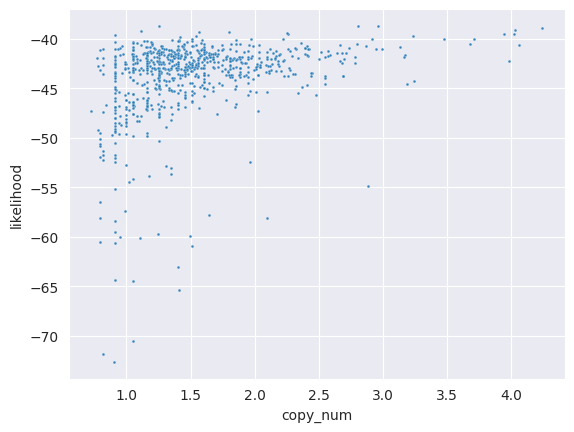

In [22]:
# Compare copy_num (Enrichment Value) vs Model Likelihood

sns.scatterplot(data=c7_data, x="copy_num", y="likelihood", alpha=0.9, s=4)
plt.show()

In [23]:
c7_vout = c7_crbm.compute_output_v(amc.dataframe_to_input(c7_data, c7_crbm.alphabet, c7_crbm.v_num, c7_crbm.q))

c7_vout = torch.concat(c7_vout, dim=1)

X_c7 = c7_vout.detach().numpy()

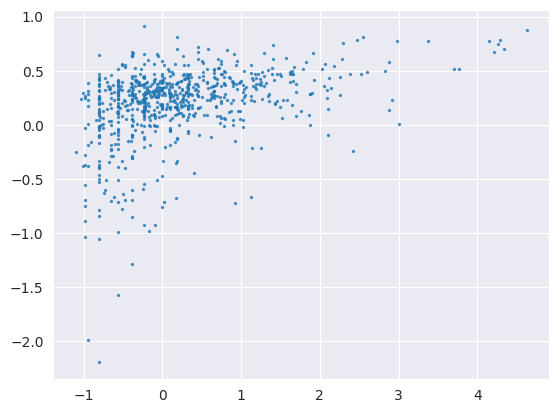

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler

# scaler = QuantileTransformer(output_distribution="uniform")
scaler = RobustScaler()
c7_enrichment = c7_data["copy_num"].to_numpy().reshape(-1, 1)
c7_scaled = scaler.fit_transform(c7_enrichment)
l = LinearRegression(positive=False, fit_intercept=True)
l.fit(X_c7, c7_scaled)

ypred = l.predict(X_c7)

plt.scatter(c7_scaled, ypred, s=2, alpha=0.7)
plt.show()

In [151]:
tmp_df.sort_values("copy_num", ascending=False, inplace=True)
tmp_df.head(2500)

sequence  copy_num  free_energy  cluster
0     CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGGTG  4.238403     7.981091        8
1     CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGCTG  4.057590     8.326882        8
2     CCATTGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG  4.028253    10.016489        8
3     CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGAT  4.017087     8.659055        8
4     CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGCTTGATG  3.983772    10.311282        8
...                                        ...       ...          ...      ...
2494  ATGGGGGGCGGGTTGGGATTGGGGTCGTTTCTACAGTGGG  1.601262    -5.426119        3
2485  CCCCCCCGGGCTTGGGGGGGTGGGTGGGGTGGGGGGTCCT  1.601262   -41.557679        2
2456  CCCCGGCGGGTTGGGGGGGGGGGGTGGGGGGGGGGGGCCT  1.601262   -37.834489        2
2392  TTGGGCTGGGGGGAGGGCAGGGTTCGGGGTCGCTATTGTA  1.601262    -7.278011        0
2496  CCCCCGCCGCCGGGGGGGGGGGGGTGGGGTGGGGGGTCCT  1.601262   -53.183504        2

[2500 rows x 4 columns]

In [158]:
tmp_df["sequence"].iloc[:500]

0      CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGGTG
1      CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGCTG
2      CCATTGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG
3      CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGAT
4      CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGCTTGATG
                         ...                   
500    GCCACGCCGGCTTGGGGGGGGGGGAGGGGTTGGGGGTCCT
498    GCCCGGCGGGCTTGGGGGGGGGGGATGGGTGCGGGGTCCT
494    TCGCGGGGGGCGGGACGGGTGCTCGCTCGAGGGGTCGCAG
497    GCCCCGCGGGCTTGGGGGGGGGGGTTGGGTCGGGGGTCCT
501    GCCCCGCGGGCTGGGGGGGGGGGGTTGGGTCGGGGGTCCT
Name: sequence, Length: 500, dtype: object

In [32]:
!pip install ViennaRNA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 11.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [33]:
def rnafold_predict_ss(seqs, molecule="dna", gquad=True, tempC=25, forward_primer='', reverse_primer=''):
    import RNA
    assert molecule in ["dna", "rna"]
    secondary_structures, energies = [], []

    # Set model details
    md = RNA.md()
    # md.dangles = 2
    # md.noLonelyPairs = 0
    md.temperature = tempC
    md.gquad = gquad
    md.noGU = True if molecule == "dna" else False

    if molecule == "dna":
        RNA.params_load_DNA_Mathews2004()
    else:
        RNA.params_load_RNA_Langdon2018()

    RNA.cvar.temperature = md.temperature  # Global setting of temperature
    # RNA.cvar.dangles = md.dangles  # Global setting of dangles
    RNA.cvar.gquad = md.gquad  # Global setting of gquad
    RNA.cvar.noGU = md.noGU  # Global setting of G/U base pairs

    # create new fold_compound object
    for seq in seqs:
        no_end_gaps = seq.rstrip("-")
        if "-" in no_end_gaps:
            energies.append(0.)
            secondary_structures.append("".join(["." for x in range(len(no_end_gaps))]))
        else:
            fc = RNA.fold_compound(forward_primer+seq+reverse_primer)
            # compute minimum free energy (mfe) and corresponding structure
            (ss, mfe) = fc.mfe()
            secondary_structures.append(ss)
            energies.append(mfe)

    return energies, secondary_structures

rna_e, rna_ss = rnafold_predict_ss(all_data["sequence"], molecule="dna", gquad=True, tempC=30, forward_primer='GGGAGAGGAGGGAGATAGATATCAA', reverse_primer='TTTCGTGGATGCCACAGGAC')

In [34]:
from pool.utils.data_prep import write_fasta
rna_e_abs = [abs(x) for x in rna_e]
write_fasta(rna_ss, rna_e_abs, '../data/cov_enriched_rna_ss.fasta')

In [17]:
!python3 -m pip install -U nupack -f ~/Downloads/nupack-4.0.1.8/package

Looking in links: /home/jonah/Downloads/nupack-4.0.1.8/package
Processing /home/jonah/Downloads/nupack-4.0.1.8/package/nupack-4.0.1.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [29]:
from nupack import *
def nupack_predict_ss(seqs, molecule="dna", ensemble="stacking", celsius=25, sodium=0.157, magnesium=0.03, forward_primer='', reverse_primer=''):
    no_wildcards = [seq for seq in seqs if "N" not in seq and "-" not in seq]
    strands = [Strand(forward_primer+seq+reverse_primer, name=str(i)) for i, seq in enumerate(no_wildcards)]
    model = Model(material=molecule.upper(), celsius=celsius, sodium=sodium, magnesium=magnesium)
    batch_size = 1
    total_batches = math.ceil(len(strands) / batch_size)
    secondary_structures, energies = [], []
    for i in range(len(strands)):
        if i % 2 == 0:
            print(f"Progress {i / (total_batches - 1) * 100}")
        t = Tube(strands={strands[i]: 1e-6}, name="Tube 1")
        tr = tube_analysis(tubes=[t], compute=['subopt'], model=model, options={'energy_gap': 2})
        secondary_structures.append(str(tr[f"({strands[i].name})"].mfe[0].structure))
        energies.append(float(tr[f"({strands[i].name})"].mfe[0].energy))

        sub_ss = [so.structure for so in tr[f"({strands[i].name})"].subopt]
        uniq = list(set(sub_ss))

        secondary_structures += uniq
        energies += [-1 for _ in uniq]

        ## The below worked prior to 4.0.1.8, can't find a place to report error of course
        # mfe_res = mfe(strands=strands[i], model=model)  # Calculate mfe for all provided sequences
        # secondary_structures.append(mfe_res[0].structure)
        # energies.append(mfe_res[0].energy)

    return energies, secondary_structures

nu_e, nu_ss = nupack_predict_ss(all_data["sequence"], celsius=25, sodium=0.157, magnesium=0.2, forward_primer='GGGAGAGGAGGGAGATAGATATCAA', reverse_primer='TTTCGTGGATGCCACAGGAC')


Progress 0.0
Progress 0.013615630744094222
Progress 0.027231261488188444
Progress 0.04084689223228266
Progress 0.05446252297637689
Progress 0.0680781537204711
Progress 0.08169378446456532
Progress 0.09530941520865954
Progress 0.10892504595275378
Progress 0.12254067669684798
Progress 0.1361563074409422
Progress 0.14977193818503642
Progress 0.16338756892913064
Progress 0.17700319967322486
Progress 0.19061883041731909
Progress 0.20423446116141333
Progress 0.21785009190550755
Progress 0.23146572264960175
Progress 0.24508135339369597
Progress 0.2586969841377902
Progress 0.2723126148818844
Progress 0.2859282456259786
Progress 0.29954387637007285
Progress 0.31315950711416707
Progress 0.3267751378582613
Progress 0.3403907686023555
Progress 0.35400639934644973
Progress 0.36762203009054395
Progress 0.38123766083463817
Progress 0.3948532915787324
Progress 0.40846892232282667
Progress 0.42208455306692083
Progress 0.4357001838110151
Progress 0.44931581455510927
Progress 0.4629314452992035
Progress 

In [30]:
from pool.utils.data_prep import write_fasta
nu_e_abs = [abs(x) for x in nu_e]
write_fasta(nu_ss, nu_e_abs, '../data/cov_enriched_ss.fasta')

In [27]:
len(nu_ss[0])

85

In [204]:
nu_ss_trimmed = [x[len('GGGAGAGGAGGGAGATAGATATCAA'):-len('TTTCGTGGATGCCACAGGAC')] for x in nu_ss]

In [205]:
nu_ss_trimmed

['(((.(..........).)))((....))............',
 '(((.(..........).)))((....))............',
 '(((..............)))((....))(....)))))).',
 '((((..........................))))))....',
 '))).............((....)).....(((((......',
 '..............((................))......',
 '))).....................(((...)))..(((..',
 ')))..........(((((....))(....)(((..(((..',
 '................................((.....)',
 '((((...............))))))).........(((((',
 '.(((..(((..(((..........))).....)))..)))',
 '.((((.(.....).)))).................(((((',
 '(((((.(.........).)))))))..........(((((',
 '(((.(..........).)))((....))............',
 '((((...))))))).....................(((((',
 '(((((.(.........).)))))))..........(((((',
 '....(.(((...........))).)...........((.(',
 '.((((.(.....).)))).................(((((',
 '.....(.(((............))).).............',
 '.....................((((........((.....',
 '...............((.((.((((....))..((((...',
 '(((..............)))((....))............',
 '........

In [169]:
s = Strand("CCATGGTAGGTATTGCTTGGTAGGGATAGTGGGTTTGGTG", name="1")

In [187]:
model = Model(material='rna', celsius=37, sodium=0.157, magnesium=0.003)

In [186]:
print(model.alphabet().__str__)

<method-wrapper '__str__' of Alphabet object at 0x7fd3ea66c440>


In [188]:
mfe_res = mfe(strands=s, model=model)

ConversionError: ["not convertible to integer (#0, <class 'str'> → uint32)", "mismatched class type (#0, <class 'str'> → nupack::Base)"]

In [228]:
imp_weights = np.where(np.dot(kmeans_pca.cluster_centers_[8][None, :], components)  > 0.4)[1]

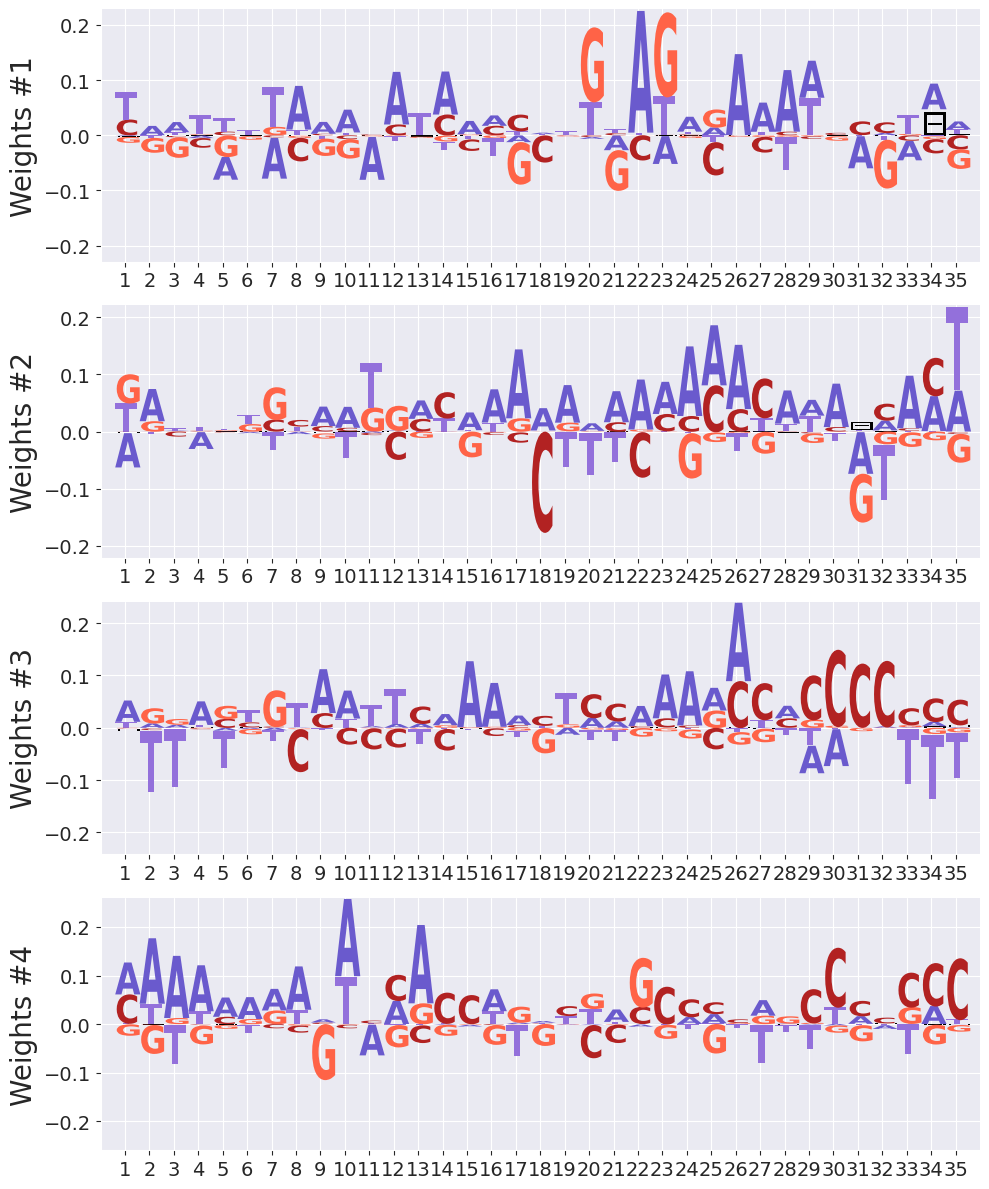

In [229]:
am.view_weights_crbm(ncrbm, ncrbm.hidden_convolution_keys[0], sort="unordered", selected=imp_weights.tolist(), molecule="dna")

In [207]:
X[tmp_df["cluster"] == 8]

array([[ 0.45269284,  0.6862105 ,  0.58394295, ..., -0.25083104,
         0.75424707,  0.7144774 ],
       [ 0.45269284,  0.6862105 ,  0.59149265, ..., -0.25083104,
         0.75424707,  0.7144774 ],
       [ 0.5238499 ,  0.58237916, -0.38181296, ..., -0.32909155,
         0.6889914 ,  0.88709843],
       ...,
       [ 0.5165974 ,  0.70144916,  0.47472036, ...,  1.1752706 ,
         1.0241318 ,  0.9304193 ],
       [ 0.44280094,  0.557486  ,  0.41009253, ...,  0.7472278 ,
         1.2025211 ,  1.08838   ],
       [ 0.4459963 ,  0.6013737 , -0.2849448 , ..., -0.57694143,
         0.97325504,  1.0155959 ]], dtype=float32)

In [32]:
def view_weights_crbm_relu_ax(crbm, hidden_key, weight_number, ax=None, sort="top", molecule="protein", title=None, view="full"):
    beta, W = utils.get_beta_and_W(crbm, hidden_key=hidden_key)
    order = np.argsort(beta)[::-1]
    assert sort in ["top", "unordered"]
    assert molecule in ["protein", "dna", "rna"]
    if sort == "top":
        W = W[order]
        selected_weights = W[weight_number]

    elif sort == "unordered":
        selected_weights = W[weight_number]

    if view == "positive":
        selected_weights = np.maximum(selected_weights, 0.)
    elif view == "negative":
        selected_weights = np.minimum(selected_weights, 0.)

    # Assume we want weights
    fig = utils.Sequence_logo(selected_weights, ax=ax, data_type="weights", title=title, molecule=molecule, ticks_every=5)

def cluster_inputs(I, hidden_unit_2d_combo, padding=0.05, size_to=None, hue_to=None,
                   size_label=None, hue_label=None, ax=None, a=0.7, size_norm=None, hue_norm=None, palette="Set2"):

    # mean = RBM.mean_h(torch.repeat_interleave(I_range.unsqueeze(1), RBM.h_num, dim=1))

    [hidden1, hidden2] = hidden_unit_2d_combo

    if type(I) is torch.tensor:
        I = I.detach().numpy()

    xlab = r'Input $I_{%s}$'%hidden1
    ylab = r'Input $I_{%s}$'%hidden2

    Ih1 = I[:, hidden1]
    Ih2 = I[:, hidden2]

    sns.color_palette(palette, as_cmap=True)
    marker_size = 10

    if size_to is not None and hue_to is None:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2, size_label: size_to})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", size=size_label, palette=palette, alpha=a, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)
    elif size_to is None and hue_to is not None:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2, hue_label: hue_to})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", hue=hue_label, palette=palette, alpha=a, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)
    elif size_to is not None and hue_to is not None:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2, size_label: size_to, hue_label: hue_to})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", size=size_label, palette=palette, hue=hue_label, alpha=a, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)
    else:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", alpha=a, palette=palette, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)

    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set_xlim([Ih1.min()-padding, Ih1.max()+padding])
    g.set_ylim([Ih2.min()-padding, Ih2.max()+padding])
    g.set_xlabel(xlab)
    g.set_ylabel(ylab)

    # How to make Legend if needed
    # leg = g.axes.flat[0].get_legend()
    # new_title = 'Inputs'
    # leg.set_title(new_title)
    # new_labels = ['label 1', 'label 2']
    # for t, l in zip(leg.texts, new_labels):
    #     t.set_text(l)

    if ax is None:
        plt.show()

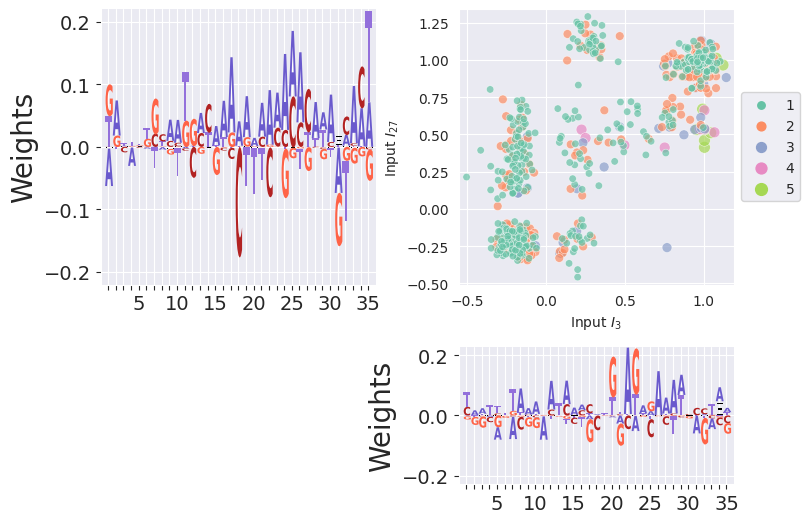

In [226]:
import matplotlib
fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [2, 1]})
axs[1][0].axis("off")

view_weights_crbm_relu_ax(ncrbm, ncrbm.hidden_convolution_keys[0], imp_weights[0], sort="unordered", ax=axs[1][1], molecule="dna", view="full")
view_weights_crbm_relu_ax(ncrbm, ncrbm.hidden_convolution_keys[0], imp_weights[1], sort="unordered", ax=axs[0][0], molecule="dna", view="full")

enrichment = pd.cut(tmp_df[tmp_df["cluster"] == 8]["copy_num"], bins=5, labels=[i for i in range(1, 6)])

cluster_inputs(torch.tensor(X[tmp_df["cluster"] == 8]), [imp_weights[0], imp_weights[1]], hue_to=enrichment, hue_label="copy_num", size_to=tmp_df[tmp_df["cluster"]==8]["copy_num"], size_label="copy_num", ax=axs[0][1], hue_norm=matplotlib.colors.BoundaryNorm(boundaries=np.array([0, 1, 2, 3, 4, 5]), ncolors=5)
, size_norm=(0, 5))

fig.subplots_adjust(wspace=0.30, hspace=0.30, left=0.00, right=0.99, top=0.99, bottom=0.0)
plt.show()

In [237]:
w1 = imp_weights[0]
w2 = imp_weights[3]
fig, axs = plt.subplots(2, 2, gridspec={'width_ratios': [1, 1], 'height_ratios': [2, 1]})
axs[1][0].axis("off")

view_weights_crbm_relu_ax(ncrbm, ncrbm.hidden_convolution_keys[0], w1, sort="unordered", ax=axs[1][1], molecule="dna", view="full")
view_weights_crbm_relu_ax(ncrbm, ncrbm.hidden_convolution_keys[0], w2, sort="unordered", ax=axs[0][0], molecule="dna", view="full")

enrichment = pd.cut(tmp_df[tmp_df["cluster"] == 8]["copy_num"], bins=5, labels=[i for i in range(1, 6)])

cluster_inputs(torch.tensor(X[tmp_df["cluster"] == 8]), [w1, w2], hue_to=enrichment, hue_label="copy_num", size_to=tmp_df[tmp_df["cluster"]==8]["copy_num"], size_label="copy_num", ax=axs[0][1], hue_norm=matplotlib.colors.BoundaryNorm(boundaries=np.array([0, 1, 2, 3, 4, 5]), ncolors=5)
, size_norm=(0, 5))

fig.subplots_adjust(wspace=0.30, hspace=0.30, left=0.00, right=0.99, top=0.99, bottom=0.0)
plt.savefig("clustout.png")

/home/jonah/PycharmProjects/phage_display_ML/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (934). n_quantiles is set to n_samples.
  warnings.warn(


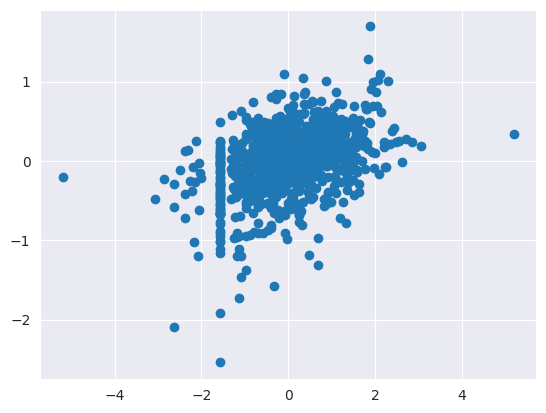

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

c8_input = X[tmp_df["cluster"] == 8]
scaler = QuantileTransformer(output_distribution="normal")
c8_enrichment = tmp_df[tmp_df["cluster"] == 8]["copy_num"].to_numpy().reshape(-1, 1)
c8_scaled = scaler.fit_transform(c8_enrichment)
l = LinearRegression(positive=False, fit_intercept=True)
l.fit(c8_input, c8_scaled)

ypred = l.predict(c8_input)

plt.scatter(c8_scaled, ypred)
plt.show()

In [28]:
np.argwhere(l.coef_[0] > 0.5).tolist()

array([[ 0],
       [23],
       [24],
       [46],
       [59],
       [77],
       [78]])

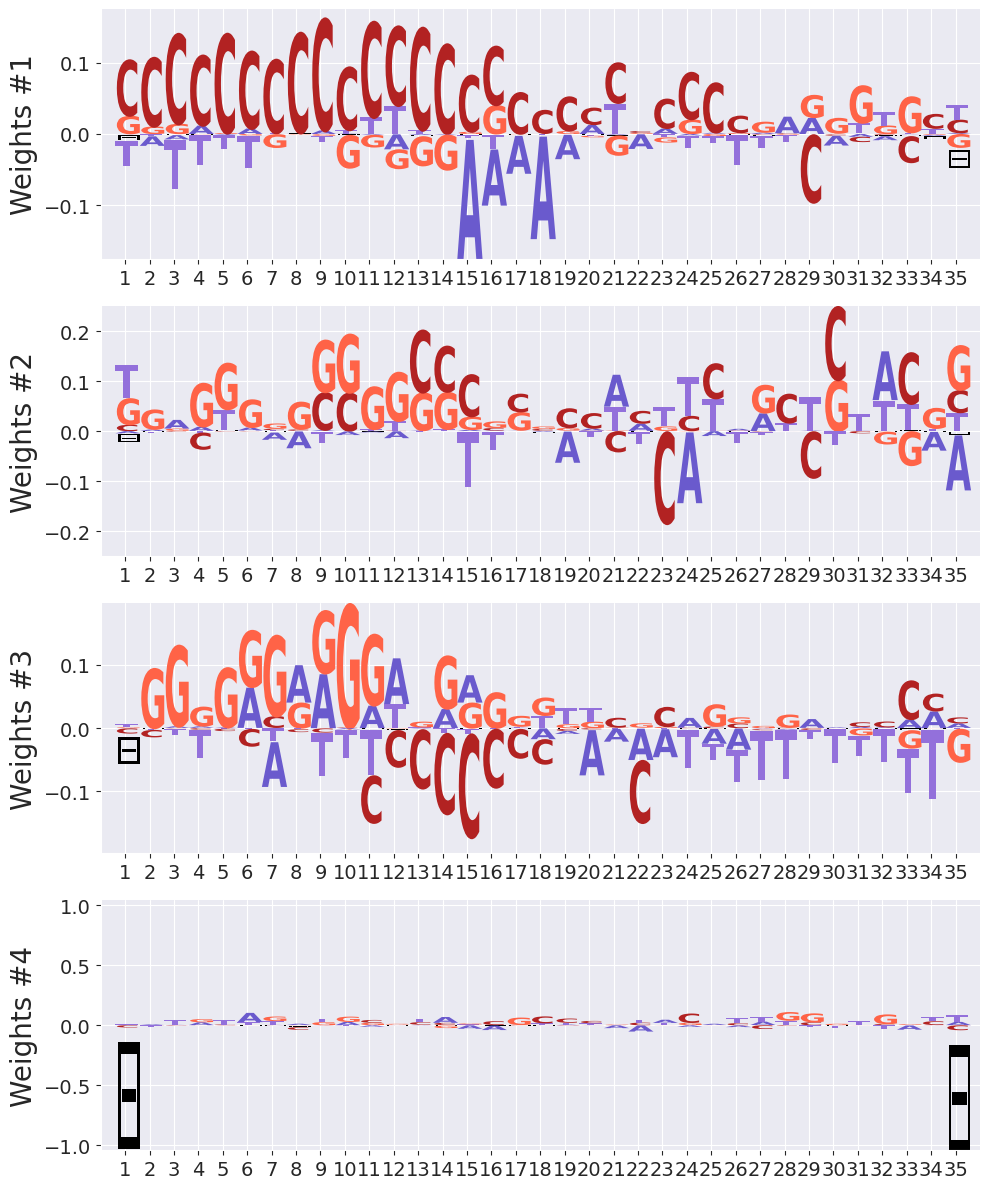

In [55]:
am.view_weights_crbm(ncrbm, ncrbm.hidden_convolution_keys[0], sort="unordered", selected=np.argpartition(l.coef_[0], -4)[-4:].tolist(), molecule="dna")

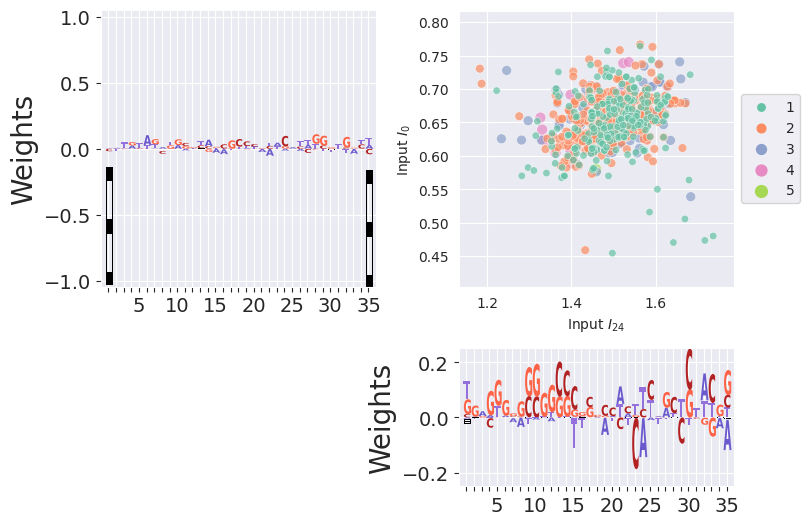

In [60]:
import matplotlib.pyplot as plt
mi_weights = np.argpartition(l.coef_[0], -4)[-4:].tolist()
# mi_weights = np.arg(l.coef_[0] > 0.5).tolist()

w1 = mi_weights[1]
w2 = mi_weights[3]

fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [2, 1]})
axs[1][0].axis("off")

view_weights_crbm_relu_ax(ncrbm, ncrbm.hidden_convolution_keys[0], w1, sort="unordered", ax=axs[1][1], molecule="dna",
                          view="full")
view_weights_crbm_relu_ax(ncrbm, ncrbm.hidden_convolution_keys[0], w2, sort="unordered", ax=axs[0][0], molecule="dna",
                          view="full")

enrichment = pd.cut(tmp_df[tmp_df["cluster"] == 8]["copy_num"], bins=5, labels=[i for i in range(1, 6)])

cluster_inputs(torch.tensor(X[tmp_df["cluster"] == 8]), [w1, w2], hue_to=enrichment, hue_label="copy_num",
               size_to=tmp_df[tmp_df["cluster"] == 8]["copy_num"], size_label="copy_num", ax=axs[0][1], size_norm=(0, 5))

fig.subplots_adjust(wspace=0.30, hspace=0.30, left=0.00, right=0.99, top=0.99, bottom=0.0)
plt.show()

In [39]:
w2

[23]

In [ ]:
import matplotlib.pyplot as plt

mapp = enriched2_data["copy_num"] > 1
data = e2_comb_input[mapp]
fold = enriched2_data[mapp]["copy_num"].tolist()
likeli = enriched2_data[mapp]["enrich2_1c_st likelihood"].tolist()
segment = enriched2_data[mapp]["segment"].tolist()

input_positions = [0,1]

fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [2, 1]})

axs[1][0].axis("off")
view_weights_crbm_ax(e1c_crbm, "hidden_20", input_positions[0], sort="top", ax=axs[1][1], molecule="dna", view="full")
view_weights_crbm_ax(e1c_crbm, "hidden_20", input_positions[1], sort="top", ax=axs[0][0], molecule="dna", view="full")
cluster_inputs(torch.tensor(data), input_positions, size_to=fold, hue_to=likeli,
                 size_label="fold", hue_label="Likelihood", size_norm=(1, 50), a=0.6, ax=axs[0][1])
fig.subplots_adjust(wspace=0.30, hspace=0.30, left=0.00, right=0.99, top=0.99, bottom=0.0)
plt.show()

In [129]:
np.dot(train_ind, components[component]).shape

(11255,)

In [81]:
kmeans_pca.labels_.tolist().index(2)

9

In [80]:
kmeans_pca.labels_.tolist()

[8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 2,
 0,
 2,
 2,
 8,
 2,
 2,
 0,
 2,
 0,
 0,
 8,
 8,
 0,
 8,
 8,
 2,
 8,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 2,
 2,
 9,
 2,
 8,
 2,
 8,
 2,
 7,
 4,
 2,
 2,
 2,
 8,
 2,
 2,
 0,
 7,
 2,
 2,
 8,
 2,
 2,
 2,
 2,
 8,
 9,
 4,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 8,
 8,
 2,
 2,
 0,
 8,
 0,
 8,
 7,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 0,
 0,
 2,
 2,
 2,
 0,
 7,
 2,
 3,
 8,
 2,
 2,
 2,
 2,
 0,
 2,
 4,
 0,
 8,
 8,
 8,
 8,
 8,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 2,
 2,
 8,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 7,
 2,
 4,
 2,
 2,
 7,
 7,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 2,
 2,
 8,
 1,
 2,
 0,
 3,
 8,
 2,
 9,
 8,
 2,
 2,
 8,
 2,
 8,
 8,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 2,
 2,
 0,
 2,
 0,
 4,
 4,
 2,
 2,
 2,
 2,
 8,
 2,
 0,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 0,
 2,
 2,
 9,
 2,
 2,
 2,
 8,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 7,
 2,
 4,
 0,


In [61]:
np.array(am.supported_colors)[kmeans_pca.labels_]

array(['c', 'c', 'c', ..., 'violet', 'k', 'k'], dtype='<U11')

In [22]:
np.where(components[7] < 0)

(array([ 2,  3,  4,  6,  7, 10, 15, 18, 20, 22, 23, 27, 30, 35, 37, 38, 39,
        42, 46, 49, 52, 55, 57, 61, 62, 63, 67, 70, 71, 72, 73, 74, 76, 78,
        79]),)

# Evaluation on Test Set of Sequences

In [29]:
import test_seqs as ts

t1 = ts.generate_test_set(set_nuc="-")
t2 = ts.generate_test_set(set_nuc="-")
t3 = ts.generate_test_set(set_nuc="-")
# t1_likelis = ncrbm.predict(t1)
# t2_likelis = ncrbm.predict(t2)
# t3_likelis = ncrbm.predict(t3)
t1_likelis = eval_ncrbm.predict(t1)
t2_likelis = eval_ncrbm.predict(t2)
t3_likelis = eval_ncrbm.predict(t3)
t1["t1_likelihood"] = t1_likelis[1]
t1["t2_likelihood"] = t2_likelis[1]
t1["t3_likelihood"] = t3_likelis[1]

t1

name                                  sequence  fluorescence  \
0   SP5_sup  ACCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGGT       1500.00   
1   SP5_pap  AACCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTTG       1500.00   
2       SP6  CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGGT       2500.00   
3   SP7_sup  CGGAGGGTAGGTAGTGCTTGGTAGGGAAACTCCGCCGGGT       2750.00   
4   SP7_pap  TAGGAGGGTAGGTAGTGCTTGGTAGGGAAACTCCGCCGAT       2750.00   
5      SP6C  CCCATGGTAGGTATTGCTTGGTAGCGATAGTGGGCTTGGT         45.00   
6     SP634  CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGGCCTAG       2250.00   
7    SP634G  CCCATGGTAGGTATTGGTTGGTAGGGATAGTGGGCCACTA         10.00   
8    SP634C  CCCATGGTAGGTATTGCTTGGTAGCGATAGTGGGCTGTAT         10.00   
9    SP634A  CCCATGGTAGGTATTGCATGGTAGGGATAGTGGGAAAACT         50.00   
10    SP630  ACTCATGGTAGGTATTGCATGGTAGGGATAGTGATCTAAT        500.00   
11    SP619  TAATGGTCATAGTATTGCATGGTAGGGATAGGACACCGCC         10.00   
12     RBD1  AGGAGGGTAGGTAGTGCTTGGTAGGGAAACTCCGCCGATT        178.60   
13     RBD2  GTTAGGTTCTGGATTAGGTTAGGGTTGTGTTGTTGTTAGG        196.42   
14     RBD3  TACAGTTGGTTGTAGGTTTTTGTTAGGTTAGTTTAGGGTT        214.42   
15     RBD4  TGGGTGTTTTGGTTGTAGGGTTTAGGTTTAGGGTACTCTT        392.82   

    t1_likelihood  t2_likelihood  t3_likelihood  
0       28.484314      28.484314      28.484314  
1       22.627701      22.627701      21.722366  
2       29.827637      29.827637      29.827637  
3       27.623871      27.623871      27.623871  
4       32.451111      32.683731      32.170380  
5       28.087173      28.087173      28.087173  
6       18.228210      22.721970      25.486694  
7       19.819992      19.802963      21.749039  
8       26.106461      24.552429      20.283081  
9       20.293808      20.366806      17.658981  
10      21.200073      18.766739      19.047241  
11       0.331192      -0.601410       5.359436  
12      32.248642      32.248642      32.248642  
13       2.217590       2.217590       2.217590  
14      12.025864      12.025864      12.025864  
15       8.277542       8.277542       8.277542

# Generating New Sequences

In [5]:
from rbm_torch.utils import seq_utils as su

# MC Sampling @ Low Temperature
gseqs_low_2, ghiddens_low_2 = utils.gen_data_lowT(ncrbm, beta=2, which = 'marginal' ,Nchains=200, Lchains=300, Nthermalize=500, Nstep=10, N_PT=20, reshape=True, update_betas=False)
gseqs_low_3, ghiddens_low_3 = utils.gen_data_lowT(ncrbm, beta=3, which = 'marginal' ,Nchains=200, Lchains=300, Nthermalize=500, Nstep=10, N_PT=20, reshape=True, update_betas=False)
# gseqs_low_1, ghiddens_low_1 = utils.gen_data_lowT(ncrbm, beta=1, which = 'marginal' ,Nchains=100, Lchains=200, Nthermalize=300, Nstep=5, N_PT=10, reshape=True, update_betas=False)

# Convert to Readable Format
gen_seqs_low_3 = su.cat_to_seq(gseqs_low_3.detach().argmax(-1).numpy(), molecule=ncrbm.molecule)
gen_seqs_low_2 = su.cat_to_seq(gseqs_low_2.detach().argmax(-1).numpy(), molecule=ncrbm.molecule)

# Put into Dataframe
low_3_seqs_pd = pd.DataFrame({"sequence": gen_seqs_low_3})
low_2_seqs_pd = pd.DataFrame({"sequence": gen_seqs_low_2})

# Drop duplicates
low_3_seqs_pd.drop_duplicates(subset="sequence", inplace=True)
low_2_seqs_pd.drop_duplicates(subset="sequence", inplace=True)

# Evaluate Model Likelihood
low_3_likelis = ncrbm.predict(low_3_seqs_pd)
low_2_likelis = ncrbm.predict(low_2_seqs_pd)

# Put into Dataframe
low_3_seqs_pd["likelihood"] = low_3_likelis[1]
low_2_seqs_pd["likelihood"] = low_2_likelis[1]

low_3_seqs_pd.to_csv("cov_enriched_low3_0.csv")
low_2_seqs_pd.to_csv("cov_enriched_low3_2.csv")

In [6]:
# MC Sampling @ Low Temperature
gseqs_low_2, ghiddens_low_2 = utils.gen_data_lowT(ncrbm, beta=2, which = 'marginal' ,Nchains=200, Lchains=300, Nthermalize=500, Nstep=10, N_PT=20, reshape=True, update_betas=False)
# gseqs_low_3, ghiddens_low_3 = utils.gen_data_lowT(ncrbm, beta=3, which = 'marginal' ,Nchains=200, Lchains=300, Nthermalize=500, Nstep=10, N_PT=20, reshape=True, update_betas=False)
gseqs_low_1, ghiddens_low_1 = utils.gen_data_lowT(ncrbm, beta=1, which = 'marginal' ,Nchains=200, Lchains=300, Nthermalize=500, Nstep=10, N_PT=20, reshape=True, update_betas=False)

# Convert to Readable Format
gen_seqs_low_3 = su.cat_to_seq(gseqs_low_3.detach().argmax(-1).numpy(), molecule=ncrbm.molecule)
gen_seqs_low_2 = su.cat_to_seq(gseqs_low_2.detach().argmax(-1).numpy(), molecule=ncrbm.molecule)

# Put into Dataframe
low_3_seqs_pd = pd.DataFrame({"sequence": gen_seqs_low_3})
low_2_seqs_pd = pd.DataFrame({"sequence": gen_seqs_low_2})

# Drop duplicates
low_3_seqs_pd.drop_duplicates(subset="sequence", inplace=True)
low_2_seqs_pd.drop_duplicates(subset="sequence", inplace=True)

# Evaluate Model Likelihood
low_3_likelis = ncrbm.predict(low_3_seqs_pd)
low_2_likelis = ncrbm.predict(low_2_seqs_pd)

# Put into Dataframe
low_3_seqs_pd["likelihood"] = low_3_likelis[1]
low_2_seqs_pd["likelihood"] = low_2_likelis[1]

low_3_seqs_pd.to_csv("cov_enriched_low3_1.csv")
low_2_seqs_pd.to_csv("cov_enriched_low2_1.csv")

In [5]:
start = 2
for _ in range(3):
    for i in [1, 2, 3]:
        gseqs_low, ghiddens_low = utils.gen_data_lowT(ncrbm, beta=i, which = 'marginal' ,Nchains=1000, Lchains=1000, Nthermalize=800, Nstep=500, N_PT=2000, reshape=True, update_betas=False)

        gen_seqs_low = su.cat_to_seq(gseqs_low.detach().argmax(-1).numpy(), molecule=ncrbm.molecule)
        # Put into Dataframe
        low_seqs_pd = pd.DataFrame({"sequence": gen_seqs_low})
        # Drop duplicates
        low_seqs_pd.drop_duplicates(subset="sequence", inplace=True)
        # Evaluate Model Likelihood
        low_likelis = ncrbm.predict(low_seqs_pd)
        # Put into Dataframe
        low_seqs_pd["likelihood"] = low_likelis[1]
        # Save
        low_seqs_pd.to_csv(f"cov_enriched_low{i}_{start}.csv")
        start += 1

KeyboardInterrupt: 

In [32]:
low_1_seqs_pd.to_csv("cov_enriched_low1_v27.csv")
low_2_seqs_pd.to_csv("cov_enriched_low2_v27.csv")

### Plot Likelihoods of Generated Data

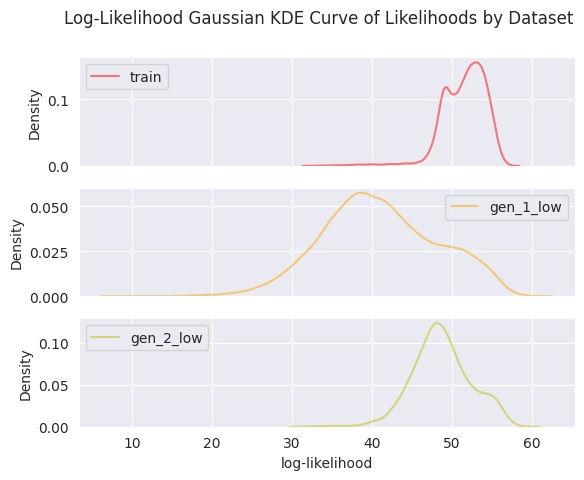

In [33]:
joined_likelihoods = {"train":ncrbm_likelihoods["likelihoods"]["train"], "gen_1_low": low_1_likelis[1], "gen_2_low": low_2_likelis[1]}

labels = list(joined_likelihoods.keys())

am.plot_likelihoods(joined_likelihoods, labels, labels, xlim=None, cdf=False)

## Alternatively

In [39]:
# Generate Data by the cluster hidden inputs

from copy import deepcopy

cluster_labels = kmeans_pca.fit_predict(X)

cluster = 5
cluster_indx = np.where(cluster_labels == cluster)[0]
samples = 1000

_ = ncrbm.compute_output_v(amc.dataframe_to_input(train_data, am.int_to_letter_dicts[ncrbm.molecule], ncrbm.v_num, ncrbm.q))
orig_max_inds = deepcopy(ncrbm.max_inds)
# prep
max_inds = []
for mi in ncrbm.max_inds:
    minp = mi.squeeze(2).detach().numpy()
    max_inds.append(minp[cluster_indx])

muniq = []
for mi in max_inds:
    muniq.append(np.unique(mi, return_counts=True, axis=0))


# sampling
ht_c = []
if type(train_vout) is not list:
    train_vout = [train_vout]

for ht in train_vout:
    htc = ht[torch.tensor(cluster_indx)]
    # ht_c.append(ht[torch.tensor(cluster_indx)])
    htc_m = htc.mean(0)
    htc_s = htc.std(0)
    ht_c.append((htc_m, htc_s))

rand_mi = []
for i in range(len(max_inds)):
    rand_mi.append(torch.tensor(max_inds[i][np.random.choice(np.arange(muniq[i][0].shape[0]), samples, p=muniq[i][1]/sum(muniq[i][1]))]).unsqueeze(2))

ncrbm.max_inds = rand_mi

h_samples = []
for h in ht_c:
    h_samples.append(h[0] + torch.randn((samples, 1)) * h[1])

oh_samples = ncrbm.sample_from_inputs_v(ncrbm.compute_output_h(h_samples))

ncrbm.max_inds = orig_max_inds

/home/jonah/PycharmProjects/phage_display_ML/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
from rbm_torch.utils import seq_utils as su
gen_seqs_clust_5 = su.cat_to_seq(oh_samples.detach().argmax(-1).numpy(), molecule=ncrbm.molecule)

In [41]:
gen_seqs_clust_5

['GCCA-CGAGCAAAACCTCTGG--TT-CT-AGTA-AAC-GA',
 'CCACCATGATGCAA--TAACGG-CAGTGGGGTCAGGA-CC',
 'AGAATGG-ACAGGA-GCGAGGATCGGTC-AAAGCATGGA-',
 '-AACTTT-C-A-GT-ATGTGTTTTTGGG--GC-ACG--AG',
 '-CTAGGA-ATGG-TAATGTCATGGG-G-CGC--CTCGG-T',
 'TGCAG-CAGAT-CCCATTGTTG-CACACGGTAATTG-G-A',
 'CCACG--GC-GATTTCC--AGTC-GATTACACT-CGGTCG',
 'TAGCCTCAGAATTAA-T--GGGACC-CT-CAAAC--AC-A',
 'AAT-TCA-G-TG-AGTTCCC--TGT--CG--AGAAAGGTA',
 'CCC-G--GG-CCGC--AGAAGAAT-TAATATCGA-TGTAT',
 '-C---CCTC--GGGCACT-GAG-G-AGGGTGT-GA-CT-T',
 'GTCCGCTCGTT-ATA-G-GGT--C-GA-GAGCTGCCACTT',
 'GGAC--TGTGGAA--A-GCGGAGGTCCATTAGTGTATAAA',
 'CGGC-CGT-CA-ACCCT-GTC-AGATGGAATGCG-CGT-C',
 'GAGCGAGC-GC-G-TGACCTGAACAGCCGA-CGT-GGCC-',
 'TTTG-ATCG-T-AGGACTT--GTTGACTTA-AAA-TCCTA',
 'GTA-GCT-T-AGCCACA-GTCGCCCGC-TCCGAC-GGCTA',
 'TAA-TCA-GTTAAAACGAACCTTGC-GGATGAC-CG-CCT',
 'TG-G-ACGGCCTGG---TCAAACAAA-A-C--GCTGGTGT',
 'GAG--GGGCA-CCCTGCC-TATG-ATCTGCTATTTGTTTA',
 'GGTACGACC-C-TTCGG-G-GGAAGGATGCGTCGGCA---',
 'ACG-GCTTC-TCCGCCGGTCGGTTCTGC-T-TTC-CCGCC',
 'GGAAAACT

# Evaluating Generated Sequences by Likelihood, Cluster Identity and Secondary Structure Prediction

In [43]:
kmeans_pca.cluster_centers_

array([[ 7.2846645e-01, -3.9846373e-01, -1.4782828e-01,  2.5343224e-01,
         9.0520173e-02,  4.1609293e-01,  2.4203379e-01, -4.0170833e-01,
         4.6494317e-01, -9.9865532e-01,  1.2450985e+00,  4.4636324e-02,
         1.6240612e+00, -1.0693669e+00, -7.8734988e-01,  1.5759267e-01,
        -1.0736556e+00,  4.8298243e-01,  1.0116009e+00,  3.2212612e-01,
        -2.4411868e-01, -8.5736644e-01, -3.7329230e-01,  1.3208554e+00,
         6.2497910e-02],
       [-9.0293956e-01, -4.3156278e-01,  1.5688175e-01,  8.2668000e-01,
        -1.0124519e+00, -8.7350196e-01,  5.7699227e-01, -3.5215044e-01,
         1.9104512e+00,  4.3494761e-01,  6.1037248e-01,  1.0100020e+00,
        -1.6955042e-01,  7.3319614e-01, -4.7053969e-01, -5.4864734e-01,
        -1.1231608e+00, -4.3345189e-01,  1.0623873e+00, -7.7572870e-01,
        -8.2558727e-01,  7.2704434e-01,  1.2736405e+00, -3.9667529e-01,
        -2.1355142e-01],
       [-2.0445134e-01,  1.1038982e+00, -5.4678452e-01,  1.2043903e-01,
         2.891

In [46]:
gseqs_low_1

tensor([[[0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.]],

        [[0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0.],
         ...,
         [0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         ...,
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 0., 1., 0.]],

        ...,

        [[0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         ...,
         [0., 0., 0., 1., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.]],

        [[0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0.],
         ...,
         [0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0.],
         

In [47]:
low_1_vout = ncrbm.compute_output_v(gseqs_low_1)
low_2_vout = ncrbm.compute_output_v(gseqs_low_2)

In [60]:
# Get distance b/t each cluster center for each sequence
cdists = torch.cdist(torch.tensor(kmeans_pca.cluster_centers_).unsqueeze(0), torch.concat(low_2_vout, dim=1).unsqueeze(0))


# Use distances to constrain to be closer


In [74]:
cdists.shape

torch.Size([1, 10, 20000])

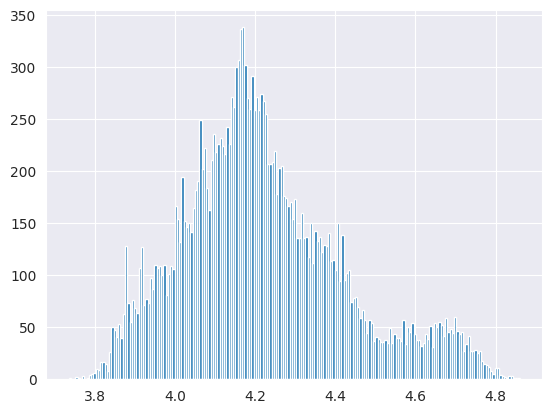

In [63]:
import matplotlib.pyplot as plt

plt.hist(cdists[0].min(dim=0)[0].detach().numpy(), bins=200)
plt.show()

In [67]:
ht_c

[(tensor([ 0.5459,  0.9512,  0.5264,  0.6871,  1.2427,  0.7460,  0.7661, -0.1401,
           0.5432,  0.5084,  0.3971, -0.1035,  0.6633,  0.8589,  0.6904,  0.5777,
           0.8120,  0.7701, -0.0502,  0.7128,  0.5546,  0.5549,  0.8278,  0.6464,
           1.1195], grad_fn=<MeanBackward1>),
  tensor([0.0778, 0.0794, 0.0414, 0.1151, 0.1548, 0.0536, 0.0527, 0.2103, 0.0600,
          0.0747, 0.1100, 0.1072, 0.0621, 0.0451, 0.0409, 0.0697, 0.0481, 0.1217,
          0.2152, 0.0652, 0.0502, 0.0844, 0.0355, 0.0559, 0.1226],
         grad_fn=<StdBackward0>))]

In [70]:
cdists[0][0]

tensor([5.3631, 5.4236, 5.3696,  ..., 4.7113, 4.7403, 4.7662],
       grad_fn=<SelectBackward0>)

In [71]:
train_vout[]

[tensor([[ 0.8961,  0.6711,  0.3793,  ...,  0.8606,  0.6050,  0.9893],
         [ 0.9007,  0.6835,  0.4124,  ...,  0.8378,  0.6016,  0.9437],
         [ 0.8961,  0.6504,  0.3793,  ...,  0.8606,  0.6050,  0.9684],
         ...,
         [ 0.4094,  1.2474,  0.4869,  ...,  0.9590,  0.6621, -0.1635],
         [ 0.4575,  1.2552,  0.4897,  ...,  0.9987,  0.6214, -0.2665],
         [ 0.4506,  1.2552,  0.4896,  ...,  0.9987,  0.5963, -0.2665]],
        grad_fn=<CatBackward0>)]

In [1]:
cluster_labels

NameError: name 'cluster_labels' is not defined